# Milestone 1: Greenhouse Emissions by Country



# INST737: Introduction to Data Science

by: Marta Alejandra Gonzalez, Robin Godinho, Sai Abhishek Gangineni





In [2]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Initial Dataset.xlsx')
print(df.head)

<bound method NDFrame.head of       CountryID Country/Region  \
0             1    Afghanistan   
1             1    Afghanistan   
2             1    Afghanistan   
3             1    Afghanistan   
4             1    Afghanistan   
...         ...            ...   
3016        194       Zimbabwe   
3017        194       Zimbabwe   
3018        194       Zimbabwe   
3019        194       Zimbabwe   
3020        194       Zimbabwe   

                                           Data Feature           1990  \
0                                GHG Emissions (MtCO2e)       2.020000   
1           Electric power consumption (kWh per capita)            NaN   
2           Fossil fuel energy consumption (% of total)            NaN   
3         GDP per capita, PPP (current international $)            NaN   
4                    Agricultural land (% of land area)      58.322984   
...                                                 ...            ...   
3016  Renewable electricity share of total 

In [ ]:
print(df.describe)

<bound method NDFrame.describe of       CountryID Country/Region  \
0             1    Afghanistan   
1             1    Afghanistan   
2             1    Afghanistan   
3             1    Afghanistan   
4             1    Afghanistan   
...         ...            ...   
3016        194       Zimbabwe   
3017        194       Zimbabwe   
3018        194       Zimbabwe   
3019        194       Zimbabwe   
3020        194       Zimbabwe   

                                           Data Feature           1990  \
0                                GHG Emissions (MtCO2e)       2.020000   
1           Electric power consumption (kWh per capita)            NaN   
2           Fossil fuel energy consumption (% of total)            NaN   
3         GDP per capita, PPP (current international $)            NaN   
4                    Agricultural land (% of land area)      58.322984   
...                                                 ...            ...   
3016  Renewable electricity share of to

In [ ]:
print(df.columns)

Index([     'CountryID', 'Country/Region',   'Data Feature',             1990,
                   1991,             1992,             1993,             1994,
                   1995,             1996,             1997,             1998,
                   1999,             2000,             2001,             2002,
                   2003,             2004,             2005,             2006,
                   2007,             2008,             2009,             2010,
                   2011,             2012,             2013,             2014,
                   2015,             2016,             2017,             2018,
                   2019,             2020,             2021,             2022],
      dtype='object')


In [ ]:
print(df.shape)

(3021, 36)


Step 1: Determine if there are any null values, and how many there are in the dataset.

In [ ]:
df.isnull()

,CountryID,Country/Region,Data Feature,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
3017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
3018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
3019,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [ ]:
df.isnull().sum()

CountryID            0
Country/Region       0
Data Feature         0
1990               403
1991               416
1992               365
1993               363
1994               359
1995               341
1996               337
1997               333
1998               332
1999               328
2000               145
2001               140
2002               137
2003               135
2004               110
2005               103
2006                99
2007                90
2008               115
2009               112
2010               115
2011               112
2012               111
2013               105
2014               108
2015               318
2016              1512
2017              2172
2018              2172
2019              2172
2020              2173
2021              2173
2022              2703
dtype: int64

Observation: Based on the null value count, it was determine that there is less missing data between the years 2000 to 2015. Therefore, other columns years will be pulled out of the dataset.



Step 2: Removing columns other than 2000 to 2015

In [ ]:
# Remove columns 1990 t0 1999
df_new = df.drop(df.iloc[:,3:13], axis = 1)

print(df_new.columns)

Index([     'CountryID', 'Country/Region',   'Data Feature',             2000,
                   2001,             2002,             2003,             2004,
                   2005,             2006,             2007,             2008,
                   2009,             2010,             2011,             2012,
                   2013,             2014,             2015,             2016,
                   2017,             2018,             2019,             2020,
                   2021,             2022],
      dtype='object')


In [ ]:
# Remove columns from 2016 to 2021
df_2 = df_new.drop(df.iloc[:,29:], axis=1)
print(df_2.columns)

Index([     'CountryID', 'Country/Region',   'Data Feature',             2000,
                   2001,             2002,             2003,             2004,
                   2005,             2006,             2007,             2008,
                   2009,             2010,             2011,             2012,
                   2013,             2014,             2015],
      dtype='object')


In [ ]:
# Remove any rows with null values
df_3 = df_2.dropna(how='any')
print(df_3)

      CountryID Country/Region  \
0             1    Afghanistan   
4             1    Afghanistan   
5             1    Afghanistan   
6             1    Afghanistan   
7             1    Afghanistan   
...         ...            ...   
3016        194       Zimbabwe   
3017        194       Zimbabwe   
3018        194       Zimbabwe   
3019        194       Zimbabwe   
3020        194       Zimbabwe   

                                           Data Feature           2000  \
0                                GHG Emissions (MtCO2e)       1.050000   
4                    Agricultural land (% of land area)      57.945817   
5                          Forest area (% of land area)       1.852782   
6              Urban population (% of total population)      22.078000   
7     Access to Clean Fuels and Technologies for coo...       8.800000   
...                                                 ...            ...   
3016  Renewable electricity share of total electrici...      45.661187   

In [ ]:
print(df_3.shape)

(2664, 19)


In [ ]:
df_3

,CountryID,Country/Region,Data Feature,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,Afghanistan,GHG Emissions (MtCO2e),1.050000,1.070000,1.340000,1.560000,1.240000,1.890000,2.160000,2.800000,4.250000,6.390000,8.360000,11.840000,10.040000,9.250000,9.170000,9.790000
4,1,Afghanistan,Agricultural land (% of land area),57.945817,57.947350,57.939684,58.083805,58.151266,58.134400,58.123668,58.129801,58.132867,58.132867,58.134400,58.131334,58.129801,58.123668,58.123668,58.123668
5,1,Afghanistan,Forest area (% of land area),1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
6,1,Afghanistan,Urban population (% of total population),22.078000,22.169000,22.261000,22.353000,22.500000,22.703000,22.907000,23.113000,23.320000,23.528000,23.737000,23.948000,24.160000,24.373000,24.587000,24.803000
7,1,Afghanistan,Access to Clean Fuels and Technologies for coo...,8.800000,9.510000,10.390000,11.460000,12.430000,13.490000,14.810000,15.990000,17.440000,18.840000,20.680000,22.330000,24.080000,26.170000,27.990000,30.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,194,Zimbabwe,Renewable electricity share of total electrici...,45.661187,37.503162,44.357750,60.734174,56.600473,52.432259,67.883120,71.573137,75.895082,75.641201,68.009233,57.855903,60.393350,53.939394,55.605426,52.724276
3017,194,Zimbabwe,Renewable energy consumption (TJ),250429.600000,250485.500000,256713.300000,266513.400000,268121.000000,270869.200000,279849.900000,282020.900000,283868.300000,288035.200000,292578.100000,297587.400000,304744.900000,311169.400000,320293.300000,324422.600000
3018,194,Zimbabwe,Renewable energy share of TFEC (%),69.258777,71.530273,74.294601,77.826737,81.581562,80.150376,78.647639,78.080141,82.031982,83.153711,82.879541,79.574227,78.019702,79.561094,81.049292,81.797809
3019,194,Zimbabwe,Total electricity output (GWh),6995.000000,7906.000000,8587.000000,8799.000000,9719.000000,9374.000000,7974.000000,7609.000000,7625.000000,7291.000000,8665.000000,9216.000000,9203.000000,9570.000000,10026.000000,9709.000000


We moved forward with created a statistics summary for each data feature in the dataset. The stand-alone features came first.

In [ ]:
#creating new datasets for specific data features
ghg_sum_stat = df_3[df_3['Data Feature'] == 'GHG Emissions (MtCO2e)']
ag_land_sum_stat = df_3[df_3['Data Feature'] == 'Agricultural land (% of land area)']
forest_area_sum_stat = df_3[df_3['Data Feature'] == 'Forest area (% of land area)']
urban_pop_sum_stat = df_3[df_3['Data Feature'] == 'Urban population (% of total population)']
energy_prim_sum_stat = df_3[df_3['Data Feature'] == 'Energy intensity level of primary energy (MJ/2011 USD PPP)']
fossil_fuel_consum_sum_stat = df_3[df_3['Data Feature'] == 'Fossil fuel energy consumption (% of total)']
gdp_per_cap_sum_stat = df_3[df_3['Data Feature'] == 'GDP per capita, PPP (current international $)']

#printing summary statistics for each new dataset
print(ghg_sum_stat.describe())
print(ag_land_sum_stat.describe())
print(forest_area_sum_stat.describe())
print(urban_pop_sum_stat.describe())
print(energy_prim_sum_stat.describe())
print(fossil_fuel_consum_sum_stat.describe())
print(gdp_per_cap_sum_stat.describe())

In [ ]:
ghg_new = ghg_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'GHG Emissions (MtCO2e)')
ghg_new

In [ ]:
ag_land_new = ag_land_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Agricultural land (% of land area)')
ag_land_new

In [ ]:
forest_new = forest_area_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Forest area (% of land area)')
forest_new

In [ ]:
urban_pop_new = urban_pop_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Urban population (% of total population)')
urban_pop_new

In [ ]:
eng_prim_new = energy_prim_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Energy intensity level of primary energy (MJ/2011 USD PPP)')
eng_prim_new

In [ ]:
fossil_fuel_consum_new = fossil_fuel_consum_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Fossil fuel energy consumption (% of total)')
fossil_fuel_consum_new

In [ ]:
gdp_per_cap_new = fossil_fuel_consum_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'GDP per capita, PPP (current international $)')
gdp_per_cap_new

After melting the datasets, we created subsets of data grouped by the first letter of each country. This was done in order to more easily visually identify outliers in the boxplots created to represent the distributions of each country based on the specific data feature selected. We began by creating subsets for the data feature 'GHG Emissions'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = ghg_new[ghg_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = ghg_new[ghg_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = ghg_new[ghg_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = ghg_new[ghg_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = ghg_new[ghg_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = ghg_new[ghg_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = ghg_new[ghg_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = ghg_new[ghg_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = ghg_new[ghg_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = ghg_new[ghg_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = ghg_new[ghg_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = ghg_new[ghg_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = ghg_new[ghg_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = ghg_new[ghg_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = ghg_new[ghg_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = ghg_new[ghg_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = ghg_new[ghg_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = ghg_new[ghg_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = ghg_new[ghg_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = ghg_new[ghg_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = ghg_new[ghg_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = ghg_new[ghg_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = ghg_new[ghg_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = ghg_new[ghg_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of GHG emissions data from each country and identify any outliers. We found outliers existing within the values coming from Barbados, Belize, Botswana, Cote d'Ivoire, Canada, Cape Verde, Chad, Cuba, Democratic Republic of the Congo, Eritrea, Eswatini, Ethiopia, Guatemala, Israel, Japan, Laos, Latvia, Lesotho, Libya, Macedonia, Malta, Moldova, Mongolia, Mozambique, Myanmar, Nicaragua, Palau, Palestine, Papua New Guinea, Philippines, Republic of Congo, Rwanda, Saint Kitts and Nevis, Samoa, Seychelles, Sierra Leone, Slovakia, Solomon Islands, Sri Lanka, Switzerland, Tajikistan, Togo, and Ukraine for GHG emissions.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=ghg_new['GHG Emissions (MtCO2e)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GHG Emissions (MtCO2e) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Agricultural Land'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = ag_land_new[ag_land_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Agricultural Land (% of land area) data from each country and identify any outliers. We found outliers existing within the values coming from Afghanistan, Algeria, Bangladesh, Belarus, Belize, Burundi, Cambodia, Colombia, Comoros, Croatia, Djibouti, Dominican Republic, Ecuador, Eritrea, Estonia, Eswatini, Georgia, Ghana, Greece, Guyana, Lesotho, Lithuania, Madagascar, Malaysia, Marshall Islands, Moldova, Mongolia, Oman, Pakistan, Panama, Samoa, Sierra Leone, Singapore, Trinidad and Tobago, Tunisia, Tuvalu, United Kingdom, and Zimbabwe for Agricultural Land (% of land area) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=ag_land_new['Agricultural land (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Agricultural land (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Forest Area'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = forest_new[forest_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = forest_new[forest_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = forest_new[forest_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = forest_new[forest_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = forest_new[forest_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = forest_new[forest_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = forest_new[forest_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = forest_new[forest_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = forest_new[forest_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = forest_new[forest_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = forest_new[forest_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = forest_new[forest_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = forest_new[forest_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = forest_new[forest_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = forest_new[forest_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = forest_new[forest_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = forest_new[forest_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = forest_new[forest_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = forest_new[forest_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = forest_new[forest_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = forest_new[forest_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = forest_new[forest_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = forest_new[forest_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = forest_new[forest_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Forest area (% of land area) data from each country and identify any outliers. We found outliers existing within the values coming from Bosnia and Herzegovina, Burundi, Cambodia, Costa Rica, Denmark, Eritrea, Ethiopia, Haiti, Indonesia, Israel, Kazakhstan, Lebanon, Norway, Portugal, Romania, Sao Tome and Principe, Singapore, Ukraine, and Zambia for Forest area (% of land area) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=forest_new['Forest area (% of land area)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Forest area (% of land area) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Urban Population'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = urban_pop_new[urban_pop_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Urban Population (% of total population) data from each country and identify any outliers. We found outliers existing within the values coming from Comoros, Grenada, Kuwait, Lithuania, Moldova, Rwanda, and Tajikistan for Urban Population (% of total population) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=urban_pop_new['Urban population (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Urban population (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Energy intensity level of primary energy (MJ/2011 USD PPP)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = eng_prim_new[eng_prim_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Energy intensity level of primary energy (MJ/2011 USD PPP) data from each country and identify any outliers. We found outliers existing within the values coming from Armenia, Belize, Bolivia, Brazil, Cambodia, Central African Republic, Chad, Dominica, Equatorial Guinea, Eritrea, Georgia, Grenada, Iraq, Israel, Libya, Luxembourg, Madagascar, Malta, Marshall Islands, Namibia, New Zealand, Niger, Palau, Samoa, Suriname, Togo, Tuvalu, Uruguay, and Vanuatu for Energy intensity level of primary energy (MJ/2011 USD PPP) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Energy intensity level of primary energy (MJ/2011 USD PPP) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Fossil Fuel Consumption'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = fossil_fuel_consum_new[fossil_fuel_consum_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Fossil fuel energy consumption (% of total) data from each country and identify any outliers. We found outliers existing within the values coming from Australia, Chile, Greece, Israel, and Sweden for Fossil fuel energy consumption (% of total) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Fossil fuel energy consumption (% of total) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'GDP per capita, PPP (current international $)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = gdp_per_cap_new[gdp_per_cap_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of GDP per capita, PPP (current international) data from each country and identify any outliers. We found outliers existing within the values coming from Australia, Chile, Greece, Israel, Sweden, and United Kingdom for GDP per capita, PPP (current international) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=gdp_per_cap_new['GDP per capita, PPP (current international $)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly GDP per capita, PPP (current international $) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

The summary statistics for features related to access came next.

In [ ]:
#creating new subsets for the features related to access
acc_ft_sum_stat = df_3[df_3['Data Feature'] == 'Access to Clean Fuels and Technologies for cooking (% of total population)']
acc_elec_rur_sum_stat = df_3[df_3['Data Feature'] == 'Access to electricity (% of rural population with access)']
acc_elec_tot_sum_stat = df_3[df_3['Data Feature'] == 'Access to electricity (% of total population)']
acc_elec_urb_sum_stat = df_3[df_3['Data Feature'] == 'Access to electricity (% of urban population with access)']

#printing the summary statistics for each subset
print(acc_ft_sum_stat.describe())
print(acc_elec_rur_sum_stat.describe())
print(acc_elec_tot_sum_stat.describe())
print(acc_elec_urb_sum_stat.describe())

These new subsets for features related to access were melted for easier distribution analysis.

In [ ]:
#melting the subset for access to clean fuels and tech and creating a new df
acc_ft_new = acc_ft_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Access to Clean Fuels and Technologies for cooking (% of total population)')
acc_ft_new

In [ ]:
#melting the subset for access to electricity (% of rural population) and creating a new df
acc_elec_rur_new = acc_elec_rur_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Access to electricity (% of rural population with access)')
acc_elec_rur_new

In [ ]:
#melting the subset for access to electricity (% of total population) and creating a new df
acc_elec_tot_new = acc_elec_tot_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Access to electricity (% of total population)')
acc_elec_tot_new

In [ ]:
#melting the subset for access to electricty (% of urban population) and creating a new df
acc_elec_urb_new = acc_elec_urb_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Access to electricity (% of urban population with access)')
acc_elec_urb_new

We created subsets based on the first letter of each country for the data feature 'Access to Clean Fuels and Technologies for cooking (% of total population)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = acc_ft_new[acc_ft_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Access to Clean Fuels and Technologies for cooking (% of total population) data from each country and identify any outliers. We found outliers existing within the values coming from Algeria, Cook Islands, Kiribati, Malaysia, Senegal, and Vanuatu for Access to Clean Fuels and Technologies for cooking (% of total population) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to Clean Fuels and Technologies for cooking (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Access to electricity (% of rural population with access)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = acc_elec_rur_new[acc_elec_rur_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Access to electricity (% of rural population with access) data from each country and identify any outliers. We found outliers existing within the values coming from Algeria, Armenia, Bosnia and Herzegovina, Cambodia, Central African Republic, Chad, Costa Rica, Jamaica, Lebanon, Mali, Mauritius, Mongolia, Myanmar, Namibia, Palau, Rwanda, Sao Tome and Principe, Senegal, South Africa, Sudan, Tanzania, and Tunisia for Access to electricity (% of rural population with access) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=acc_elec_rur_new['Access to electricity (% of rural population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of rural population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Access to electricity (% of total population)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = acc_elec_tot_new[acc_elec_tot_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Access to electricity (% of total population) data from each country and identify any outliers. We found outliers existing within the values coming from Algeria, Armenia, Malawi, Mongolia, Myanmar, Palau, Sao Tome and Principe, South Africa, Sudan, Tunisia, and Zimbabwe for Access to electricity (% of total population) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=acc_elec_tot_new['Access to electricity (% of total population)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of total population) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Access to electricity (% of urban population with access)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = acc_elec_urb_new[acc_elec_urb_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Access to electricity (% of urban population with access) data from each country and identify any outliers. We found outliers existing within the values coming from Belize, Brazil, Burundi, Costa Rica, Cuba, Gabon, Guinea-Bissau, Guyana, Haiti, Jordan, Malawi, Nigeria, Palau, Senegal, Seychelles, Sudan, Thailand, Trinidad and Tobago, Uzbekistan,  and Zimbabwe for Access to electricity (% of urban population with access) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=acc_elec_urb_new['Access to electricity (% of urban population with access)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Access to electricity (% of urban population with access) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

The summary statistics for features related to renewable resources came next.

In [ ]:
#creating new subsets of features related to renewable resources
ren_elec_out_sum_stat = df_3[df_3['Data Feature'] == 'Renewable electricity output (GWh)']
ren_elec_perc_sum_stat = df_3[df_3['Data Feature'] == 'Renewable electricity share of total electricity output (%)']
ren_eng_consum_sum_stat = df_3[df_3['Data Feature'] == 'Renewable energy consumption (TJ)']
ren_eng_perc_sum_stat = df_3[df_3['Data Feature'] == 'Renewable energy share of TFEC (%)']

#printing the summary statistics for these new subsets
print(ren_elec_out_sum_stat.describe())
print(ren_elec_perc_sum_stat.describe())
print(ren_eng_consum_sum_stat.describe())
print(ren_eng_perc_sum_stat.describe())

These new subsets for features related to renewable resources were melted for easier distribution analysis.

In [ ]:
#melting the subset for renewable electricity output and creating a new df
renew_elec_out_new = ren_elec_out_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Renewable electricity output (GWh)')
renew_elec_out_new

In [ ]:
#melting the subset for renewable electricity share of total electricity output and creating a new df
renew_elec_share_tot_new = ren_elec_perc_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Renewable electricity share of total electricity output (%)')
renew_elec_share_tot_new

In [ ]:
#melting the subset for renewable energy consumption and creating a new df
renew_eng_consum_new = ren_eng_consum_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Renewable energy consumption (TJ)')
renew_eng_consum_new

In [ ]:
#melting the subset for renewabe energy share of TFEC and creating a new df
renew_eng_share__tfec_new = ren_elec_perc_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Renewable energy share of TFEC (%)')
renew_eng_share__tfec_new

We created subsets based on the first letter of each country for the data feature 'Renewable electricity output (GWh)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = renew_elec_out_new[renew_elec_out_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Renewable electricity output (GWh) data from each country and identify any outliers. We found outliers existing within the values coming from Albania, Algeria, Andorra, Antigua and Barbuda, Armenia, Bangladesh, Benin, Bosnia and Herzegovina, Botswana, Burkina Faso, Cambodia, Cape Verde, Cook Islands, Costa Rica, Dominica, Dominican Republic, Equatorial Guinea, Guinea, Israel, Japan, Jordan, Kazakhstan, Kenya, Kiribati, Madagascar, Malaysia, Maldives, Mali, Malta, Marshall Islands, Mauritania, Mauritius, Moldova, Mongolia, Namibia, Nigeria, Pakistan, Panama, Paraguay, Rwanda, Sao Tome and Principe, Saudi Arabia, Senegal, Seychelles, Singapore, Slovenia, Solomon Islands, South Africa, South Sudan, Sri Lanka, Sweden, Tajikistan, Tonga, Tunisia, Tuvalu, Uganda, Ukraine, United Arab Emirates, United Kingdom, and Zimbabwe for Renewable electricity output (GWh) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=renew_elec_out_new['Renewable electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Renewable electricity share of total electricity output (%)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = renew_elec_share_tot_new[renew_elec_share_tot_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Renewable electricity share of total electricity output (%) data from each country and identify any outliers. We found outliers existing within the values coming from Algeria, Antigua and Barbuda, Argentina, Armenia, Australia, Bangladesh, Benin, Botswana, Brazil, Cambodia, Cape Verde, Central African Republic, China, Cook Islands, Ethiopia, Honduras, Indonesia, Israel, Japan, Kenya, Kiribati, Luxembourg, Maldives, Mali, Malta, Marshall Islands, Mauritania, Moldova, Mongolia, Mozambique, Namibia, Nepal, Pakistan, Papau New Guinea, Paraguay, Saudi Arabia, Senegal, Seychelles, Singapore, Slovenia, Solomon Islands, South Africa, South Sudan, Sri Lanka, Tonga, Tuvalu, United Arab Emirates, United Kingdom, and Zambia for Renewable electricity share of total electricity output (%) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable electricity share of total electricity output (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Renewable energy consumption (TJ)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = renew_eng_consum_new[renew_eng_consum_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Renewable energy consumption (TJ) data from each country and identify any outliers. We found outliers existing within the values coming from Andorra, Armenia, Azerbaijan, Bosnia and Herzegovina, Cape Verde, Chile, Djibouti, Dominican Republic, Equatorial Guinea, Ghana, Japan, Kiribati, Luxembourg, Malaysia, Malta, Mongolia, Morocco, Myanmar, Niger, Panama, Seychelles, Singapore, South Sudan, Tajikistan, Timor-Leste, and Tunisia for Renewable energy consumption (TJ) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=renew_eng_consum_new['Renewable energy consumption (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy consumption (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Renewable energy share of TFEC (%)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = renew_eng_share__tfec_new[renew_eng_share__tfec_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Renewable energy share of TFEC (%) data from each country and identify any outliers. We found outliers existing within the values coming from Algeria, Antigua and Barbuda, Argentina, Armenia, Australia, Bangladesh, Benin, Botswana, Brazil, Cambodia, Cape Verde, Central African Republic, China, Cook Islands, Ethiopia, Honduras, Indonesia, Israel, Japan, Kenya, Kiribati, Luxembourg, Maldives, Mali, Malta, Marshall Islands, Mauritania, Moldova, Mongolia, Mozambique, Namibia, Nepal, Pakistan, Papau New Guinea, Paraguay, Saudi Arabia, Senegal, Seychelles, Singapore, Slovenia, Solomon Islands, South Africa, South Sudan, Sri Lanka, Tonga, Tuvalu, United Arab Emirates, United Kingdom, and Zambia for Renewable energy share of TFEC (%) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Renewable energy share of TFEC (%) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

The summary statistics for the data features described as 'totals' were last.

In [ ]:
#creating subsets of the data features described as 'totals'
tot_elec_out_sum_stat = df_3[df_3['Data Feature'] == 'Total electricity output (GWh)']
tot_eng_consum_sum_stat = df_3[df_3['Data Feature'] == 'Total final energy consumption (TFEC) (TJ)']

#printing summary statistics for these subsets
print(tot_elec_out_sum_stat.describe())
print(tot_eng_consum_sum_stat.describe())

These new subsets for features related to access were melted for easier distribution analysis.

In [ ]:
#melting the subset for total electricity output and creating a new df
tot_elec_out_new = tot_elec_out_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Total electricity output (GWh)')
tot_elec_out_new

In [ ]:
#melting the subset for total final energy consumption and creating a new df
tot_eng_consum_new = tot_eng_consum_sum_stat.melt(id_vars = ['CountryID', 'Country/Region', 'Data Feature'],
                  var_name = 'Year',
                  value_name = 'Total final energy consumption (TFEC) (TJ)')
tot_eng_consum_new

We created subsets based on the first letter of each country for the data feature 'Total electricity output (GWh)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = tot_elec_out_new[tot_elec_out_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Total electricity output (GWh) data from each country and identify any outliers. We found outliers existing within the values coming from Andorra, Belgium, Benin, Botswana, Burkina Faso, Cambodia, Czech Republic, Denmark, Dominica, Equatorial Guinea, France, Hungary, Kiribati, Mali, Malta, Moldova, New Zealand, Papau New Guinea, Paraguay, South Africa, South Sudan, Spain, Switzerland, Tajikistan, Timor-Leste, Tuvalu, and Uzbekistan for Total electricity output (GWh) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=tot_elec_out_new['Total electricity output (GWh)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total electricity output (GWh) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created subsets based on the first letter of each country for the data feature 'Total final energy consumption (TFEC) (TJ)'.

In [ ]:
#isolating countries starting with the letter 'A'
a_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('A')]
a_countries

#isolating countries starting with the letter 'B'
b_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('B')]
b_countries

#isolating countries starting with the letter 'C'
c_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('C')]
c_countries

#isolating countries starting with the letter 'D'
d_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('D')]
d_countries

#isolating countries starting with the letter 'E'
e_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('E')]
e_countries

#isolating countries starting with the letter 'F'
f_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('F')]
f_countries

#isolating countries starting with the letter 'G'
g_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('G')]
g_countries

#isolating countries starting with the letter 'H'
h_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('H')]
h_countries

#isolating countries starting with the letter 'I'
i_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('I')]
i_countries

#isolating countries starting with the letter 'J'
j_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('J')]
j_countries

#isolating countries starting with the letter 'K'
k_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('K')]
k_countries

#isolating countries starting with the letter 'L'
l_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('L')]
l_countries

#isolating countries starting with the letter 'M'
m_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('M')]
m_countries

#isolating countries starting with the letter 'N'
n_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('N')]
n_countries

#isolating countries starting with the letter 'O'
o_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('O')]
o_countries

#isolating countries starting with the letter 'P'
p_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('P')]
p_countries

#isolating countries starting with the letter 'Q'
q_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('Q')]
q_countries

#isolating countries starting with the letter 'R'
r_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('R')]
r_countries

#isolating countries starting with the letter 'S'
s_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('S')]
s_countries

#isolating countries starting with the letter 'T'
t_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('T')]
t_countries

#isolating countries starting with the letter 'U'
u_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('U')]
u_countries

#isolating countries starting with the letter 'V'
v_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('V')]
v_countries

#isolating countries starting with the letter 'Y'
y_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('Y')]
y_countries

#isolating countries starting with the letter 'S'
z_countries = tot_eng_consum_new[tot_eng_consum_new['Country/Region'].str.startswith('Z')]
z_countries

We created boxplots to visualize the distributions of Total final energy consumption (TFEC) (TJ) data from each country and identify any outliers. We found outliers existing within the values coming from Austria, Bosnia and Herzegovina, Cuba, Estonia, Grenada, Iraq, Latvia, Libya, Myanmar, Netherlands, New Zealand, Nicaragua, Norway, Philippines, South Sudan, Timor-Leste, Tuvalu, and Ukraine for Total final energy consumption (TFEC) (TJ) measurements.

In [ ]:
#Boxplot distributions with outlier marker for countries starting with the letter 'A'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= a_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'B'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= b_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'C'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= c_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'D'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= d_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'E'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= e_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'F'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= f_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'G'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= g_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'H'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= h_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'I'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= i_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'J'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= j_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'K'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= k_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'L'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= l_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'M'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= m_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'N'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= n_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'O'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= o_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'P'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= p_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Q'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= q_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'R'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= r_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'S'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= s_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'T'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= t_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'U'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= u_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'V'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= v_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Y'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= y_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

#Boxplot distributions with outlier marker for countries starting with the letter 'Z'
sns.set(rc={'figure.figsize':(30,11)}, font_scale=2.0, style='white')
sns.boxplot(x= z_countries['Country/Region'], y=tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "orange",
                       "markersize": "30"},
            flierprops={"marker": "x",
                       "markeredgecolor":'purple',
                       "markersize": "20"},
           medianprops={"color": "black", "linewidth": 1.5}).set_title('Distribution of the yearly Total final energy consumption (TFEC) (TJ) by Country/Region (2000-2015)')
plt.xticks(rotation=45)
plt.show()

We created scatterplots between all of the variables and GHG Emissions to visualize the relationships each variable had with greenhouse gas emissions.

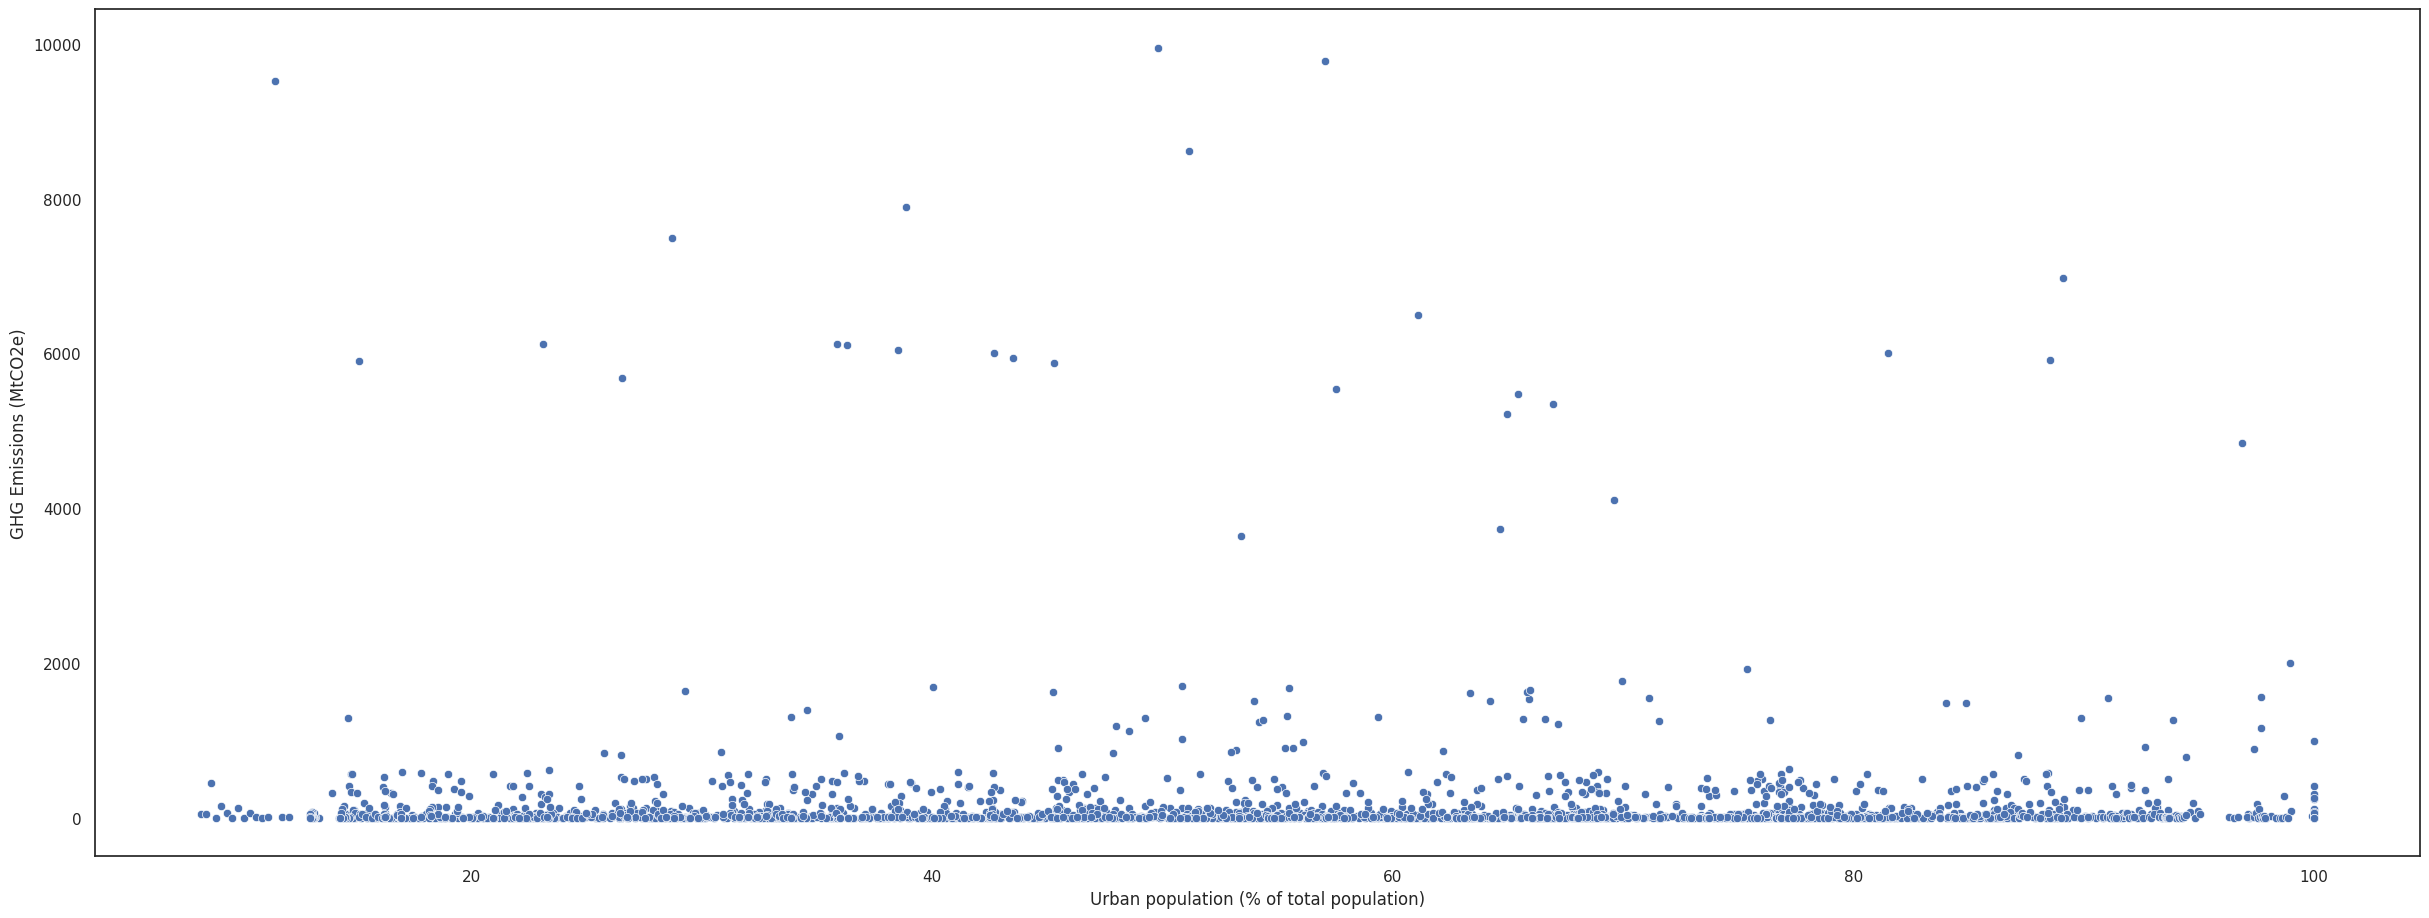

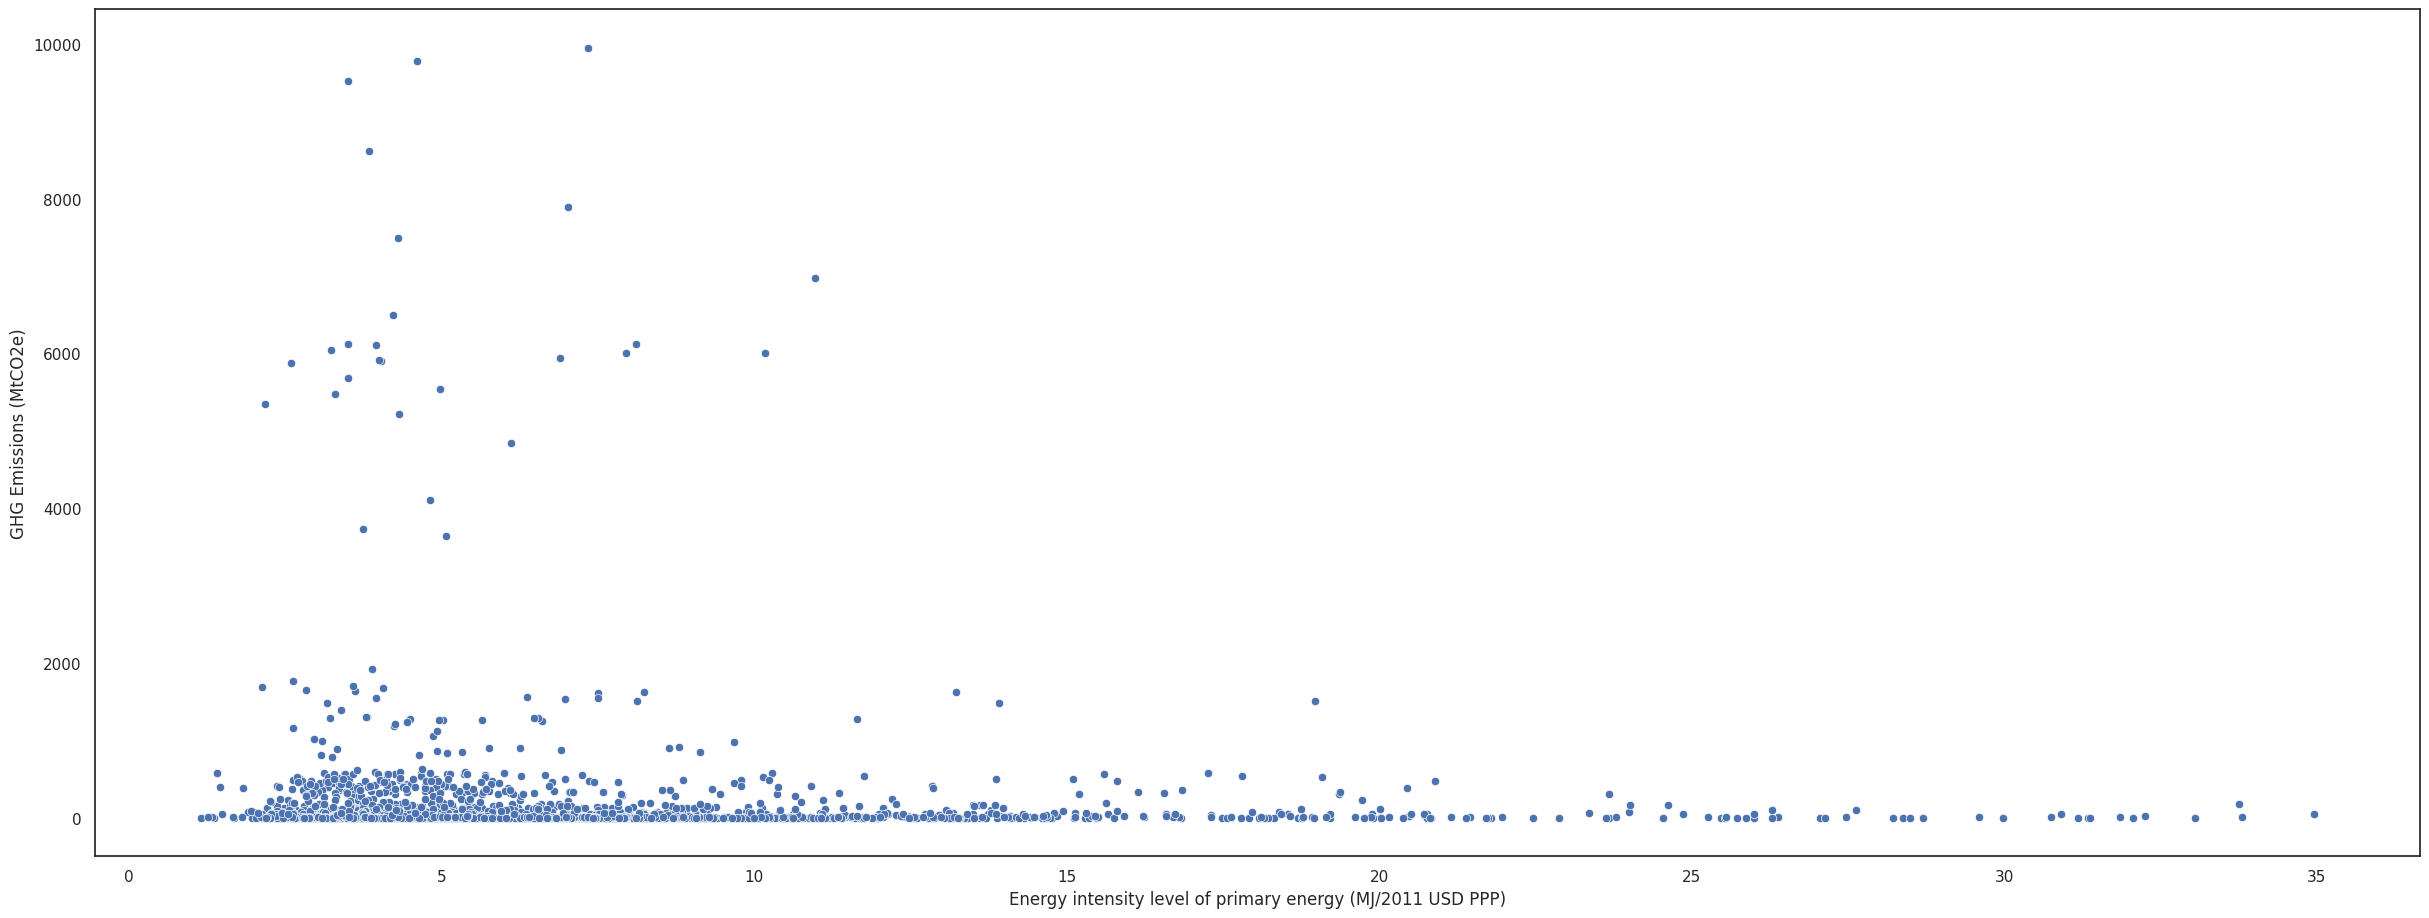

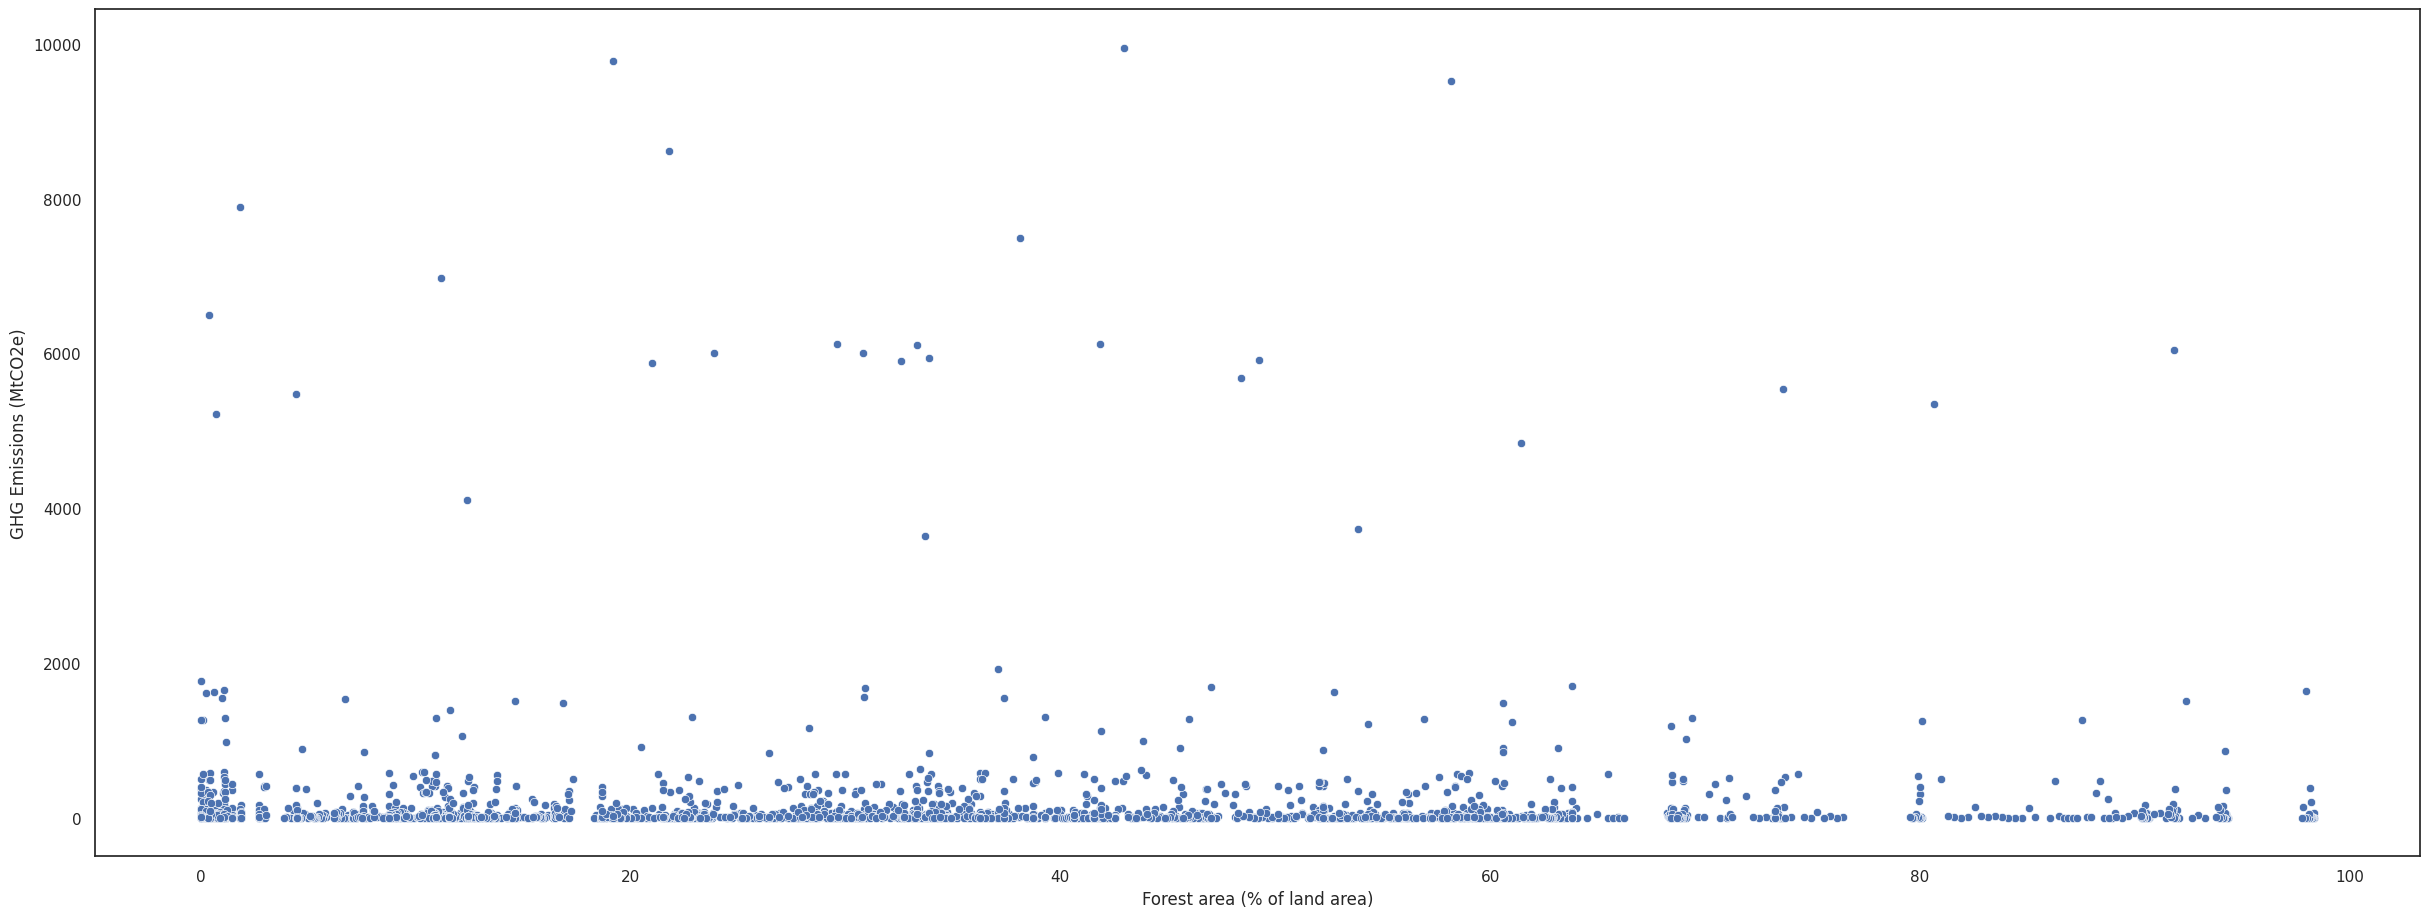

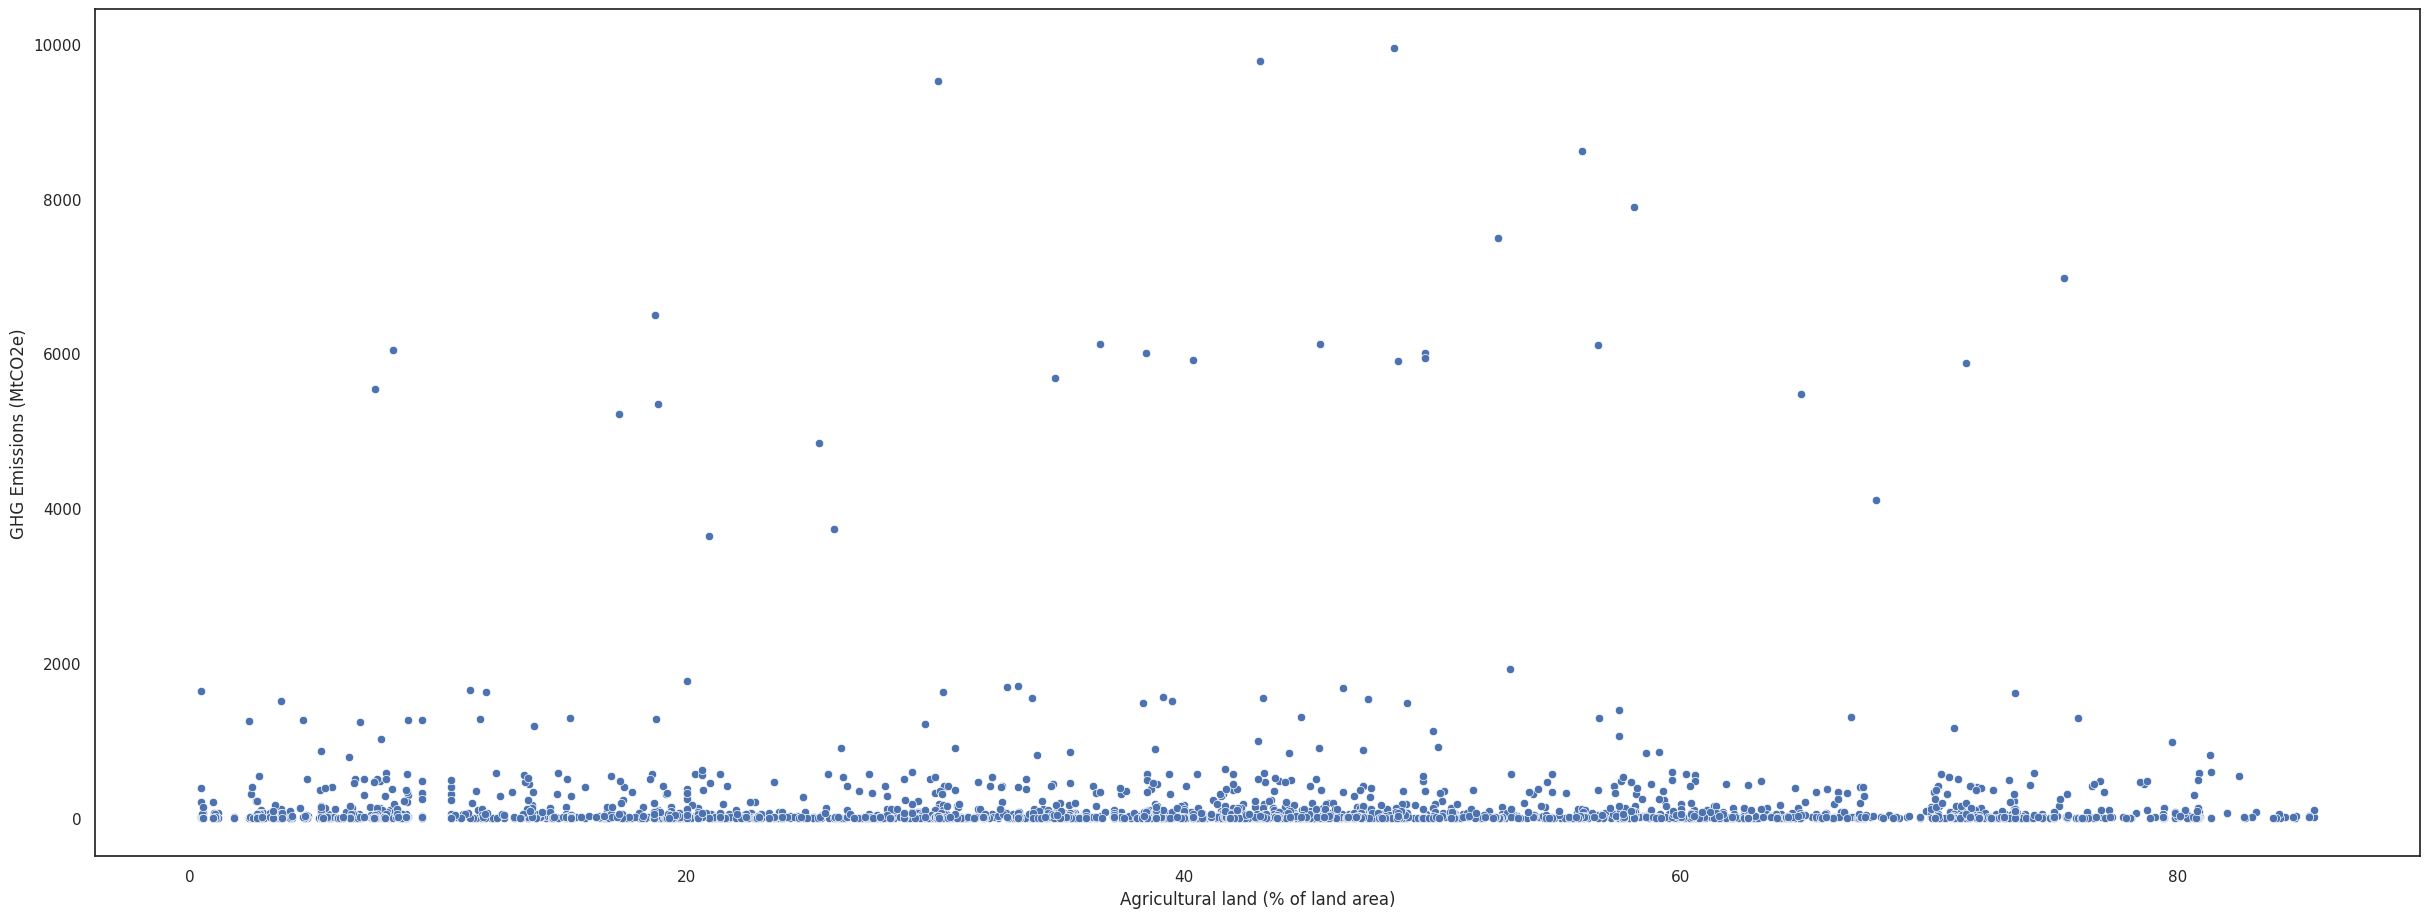

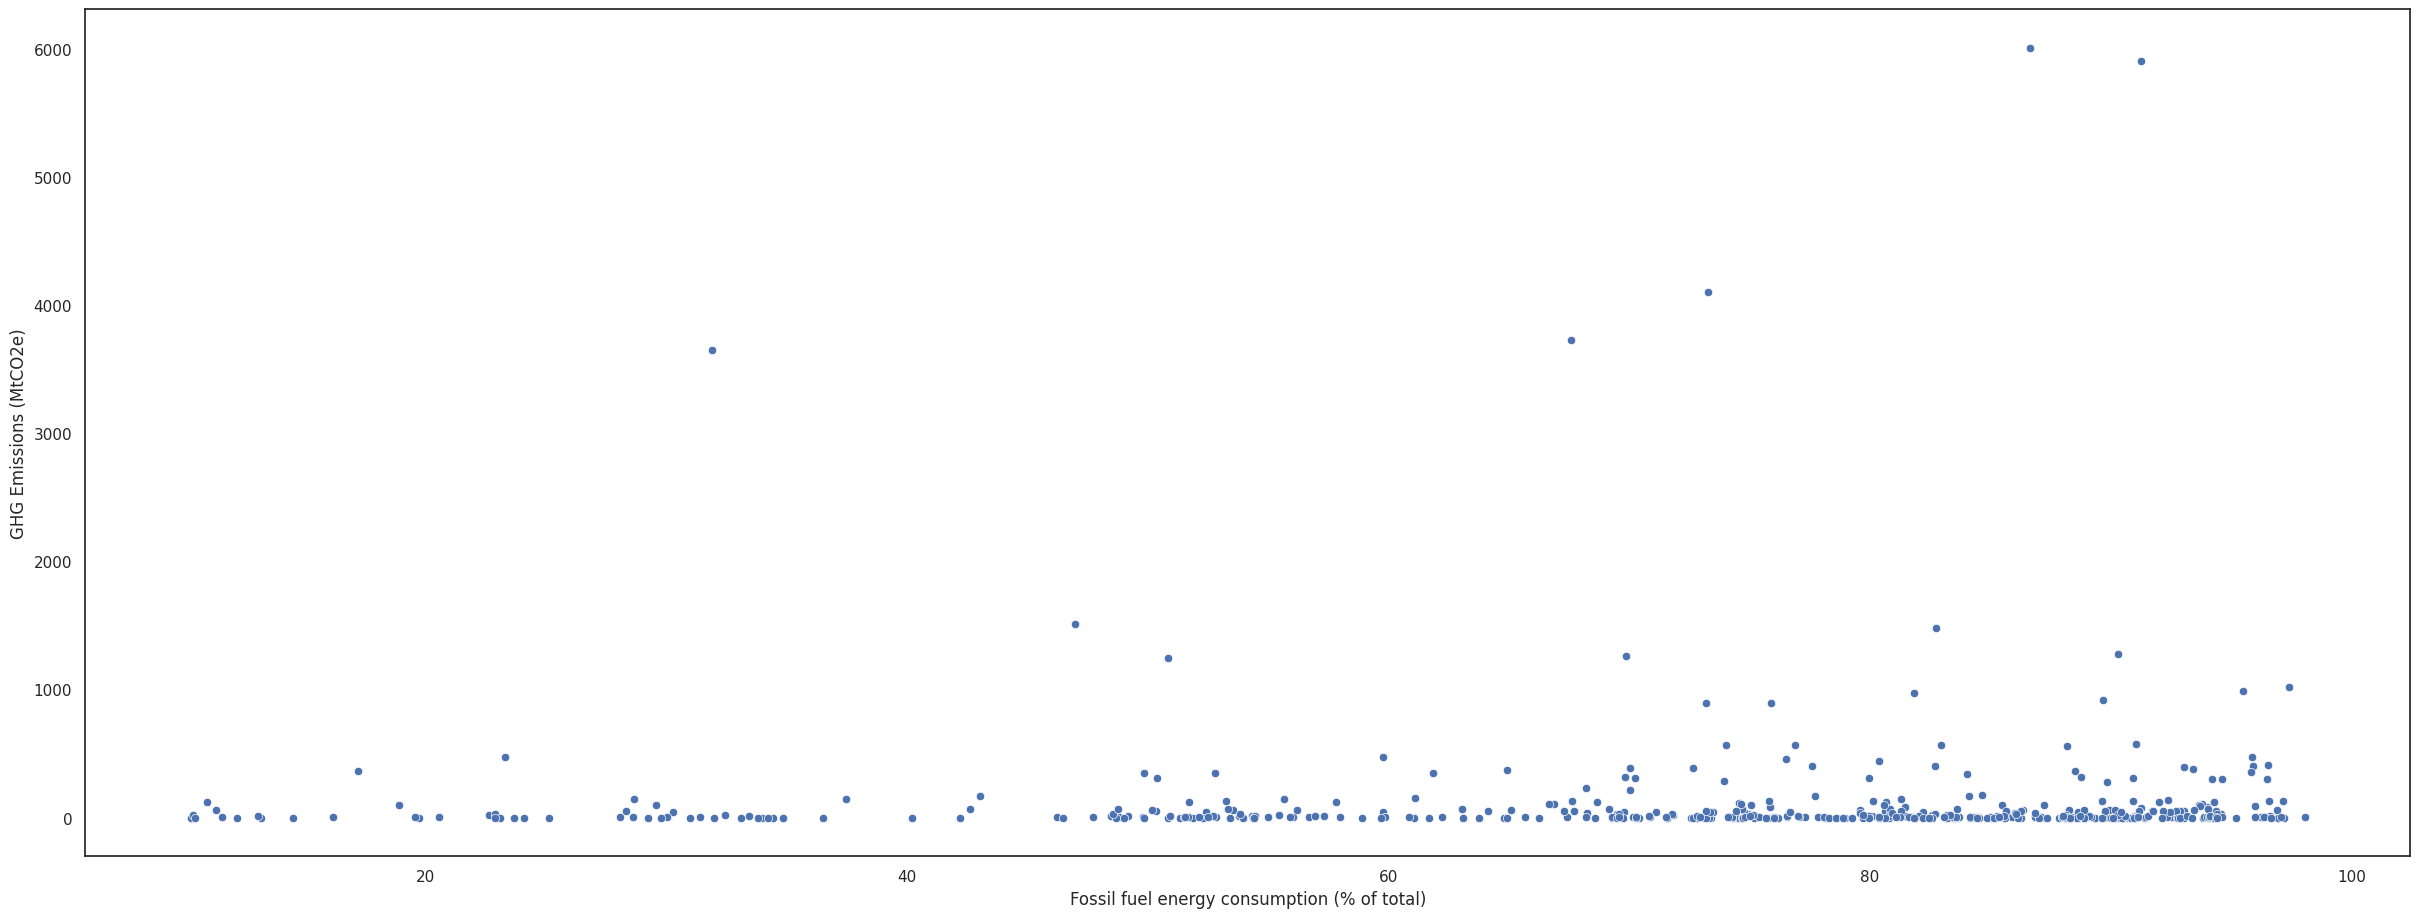

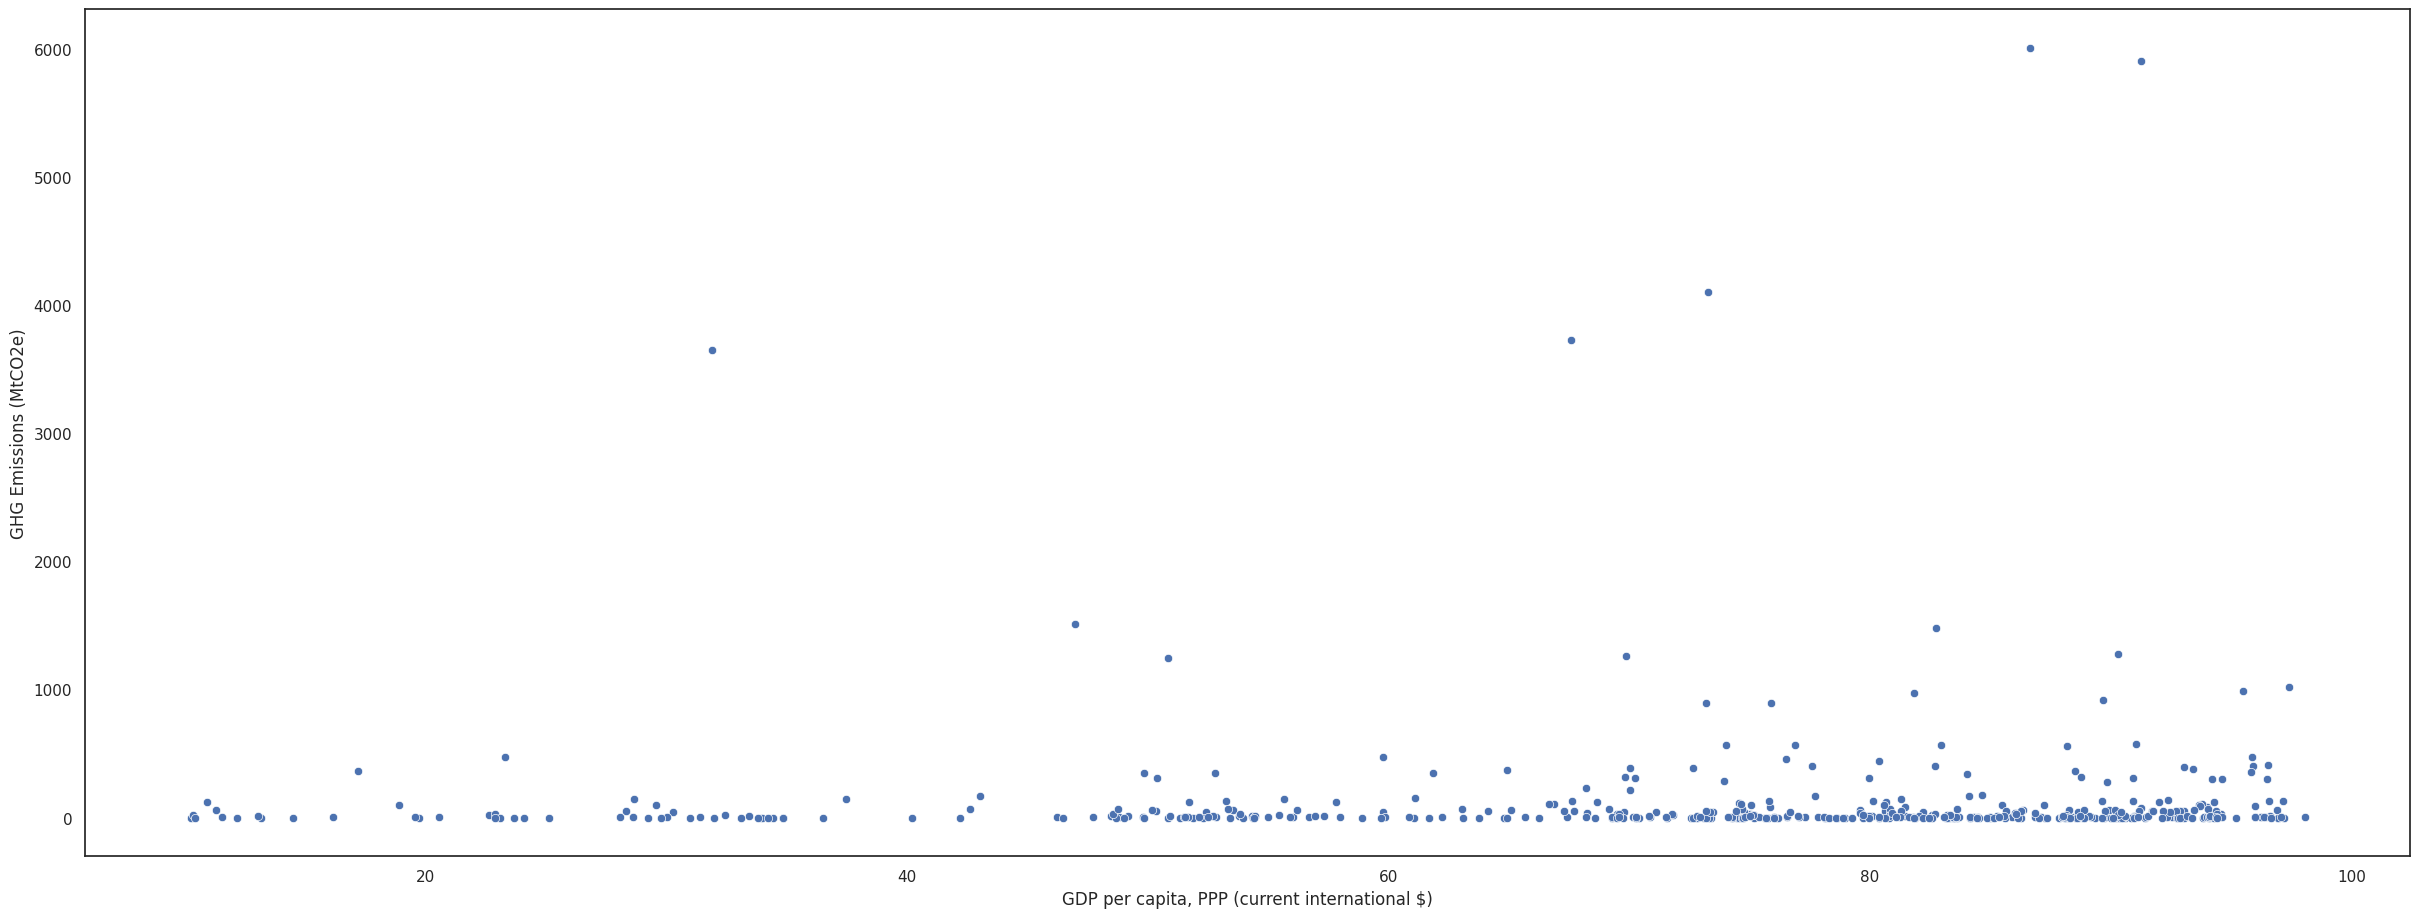

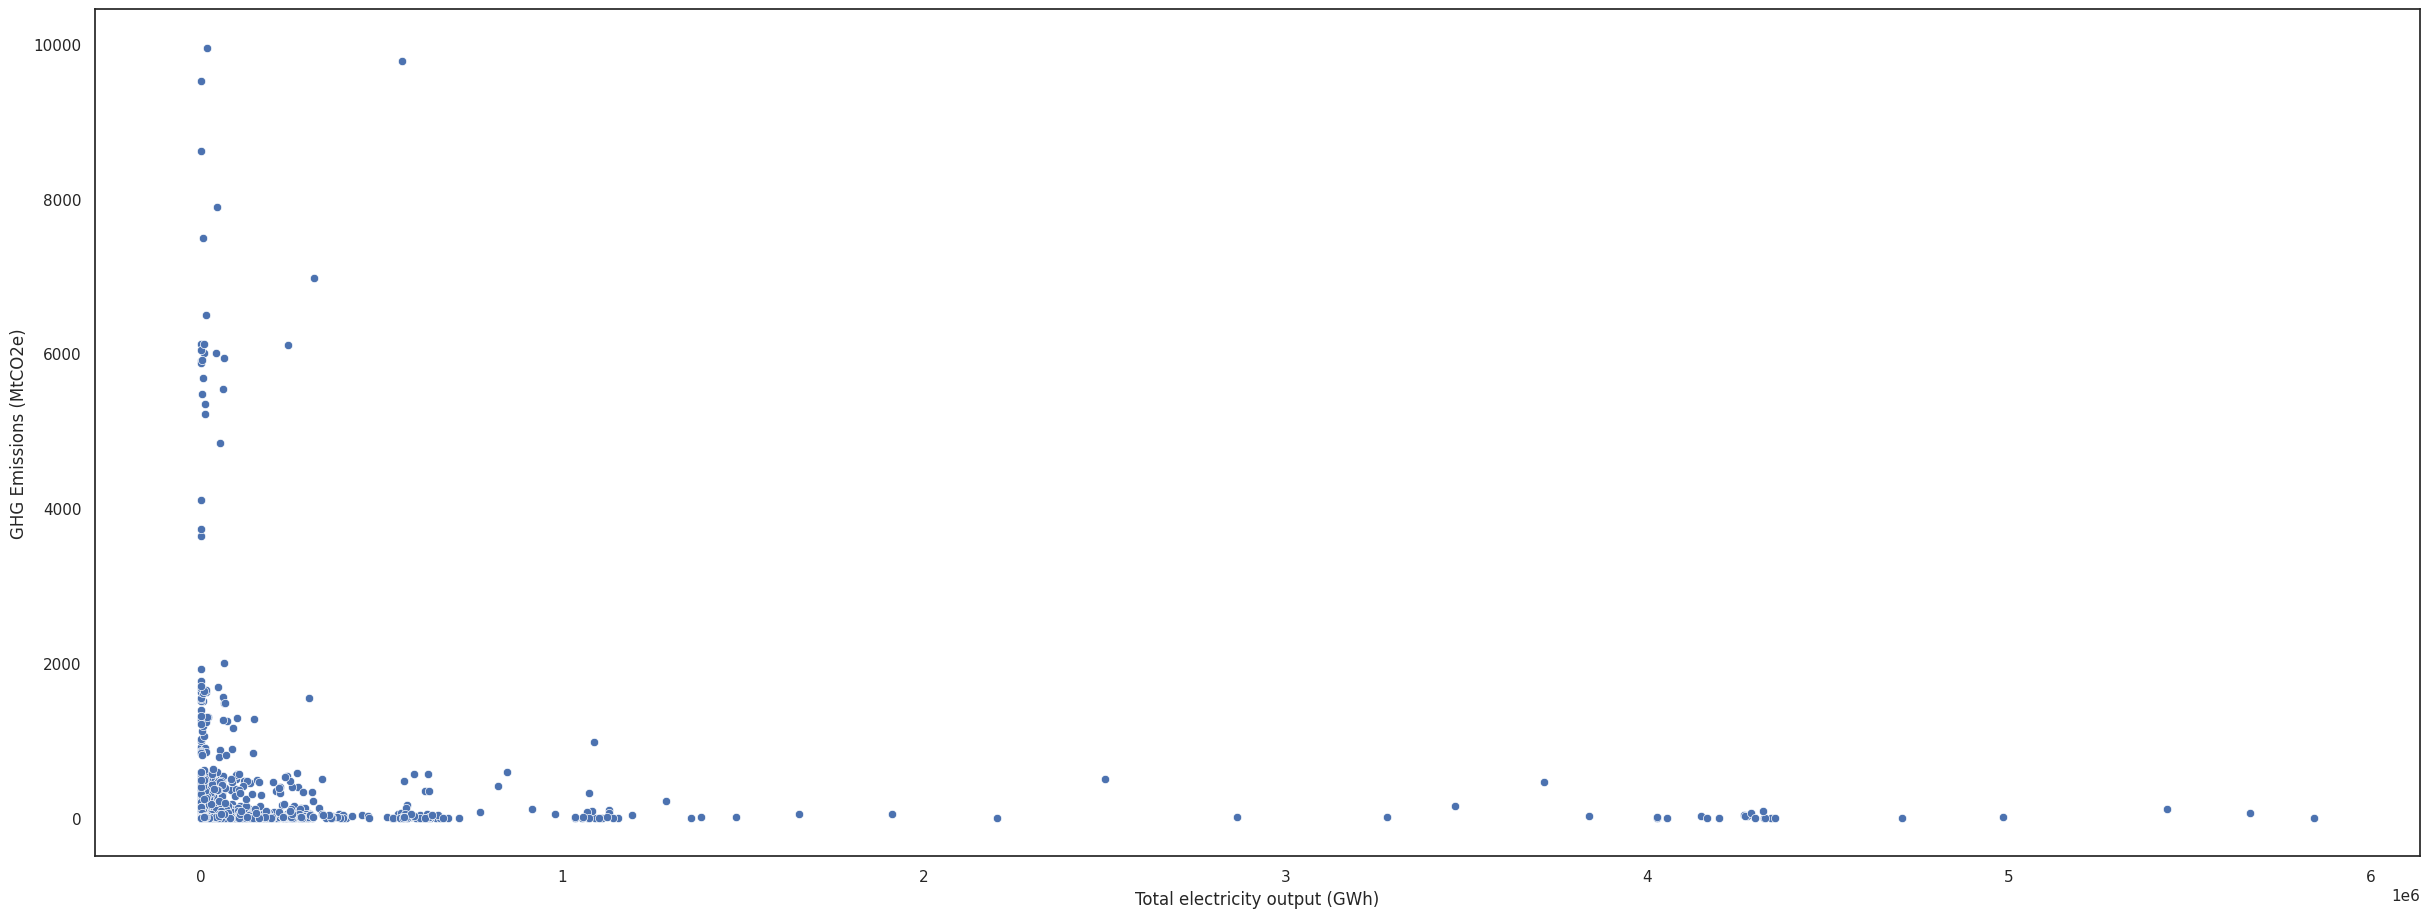

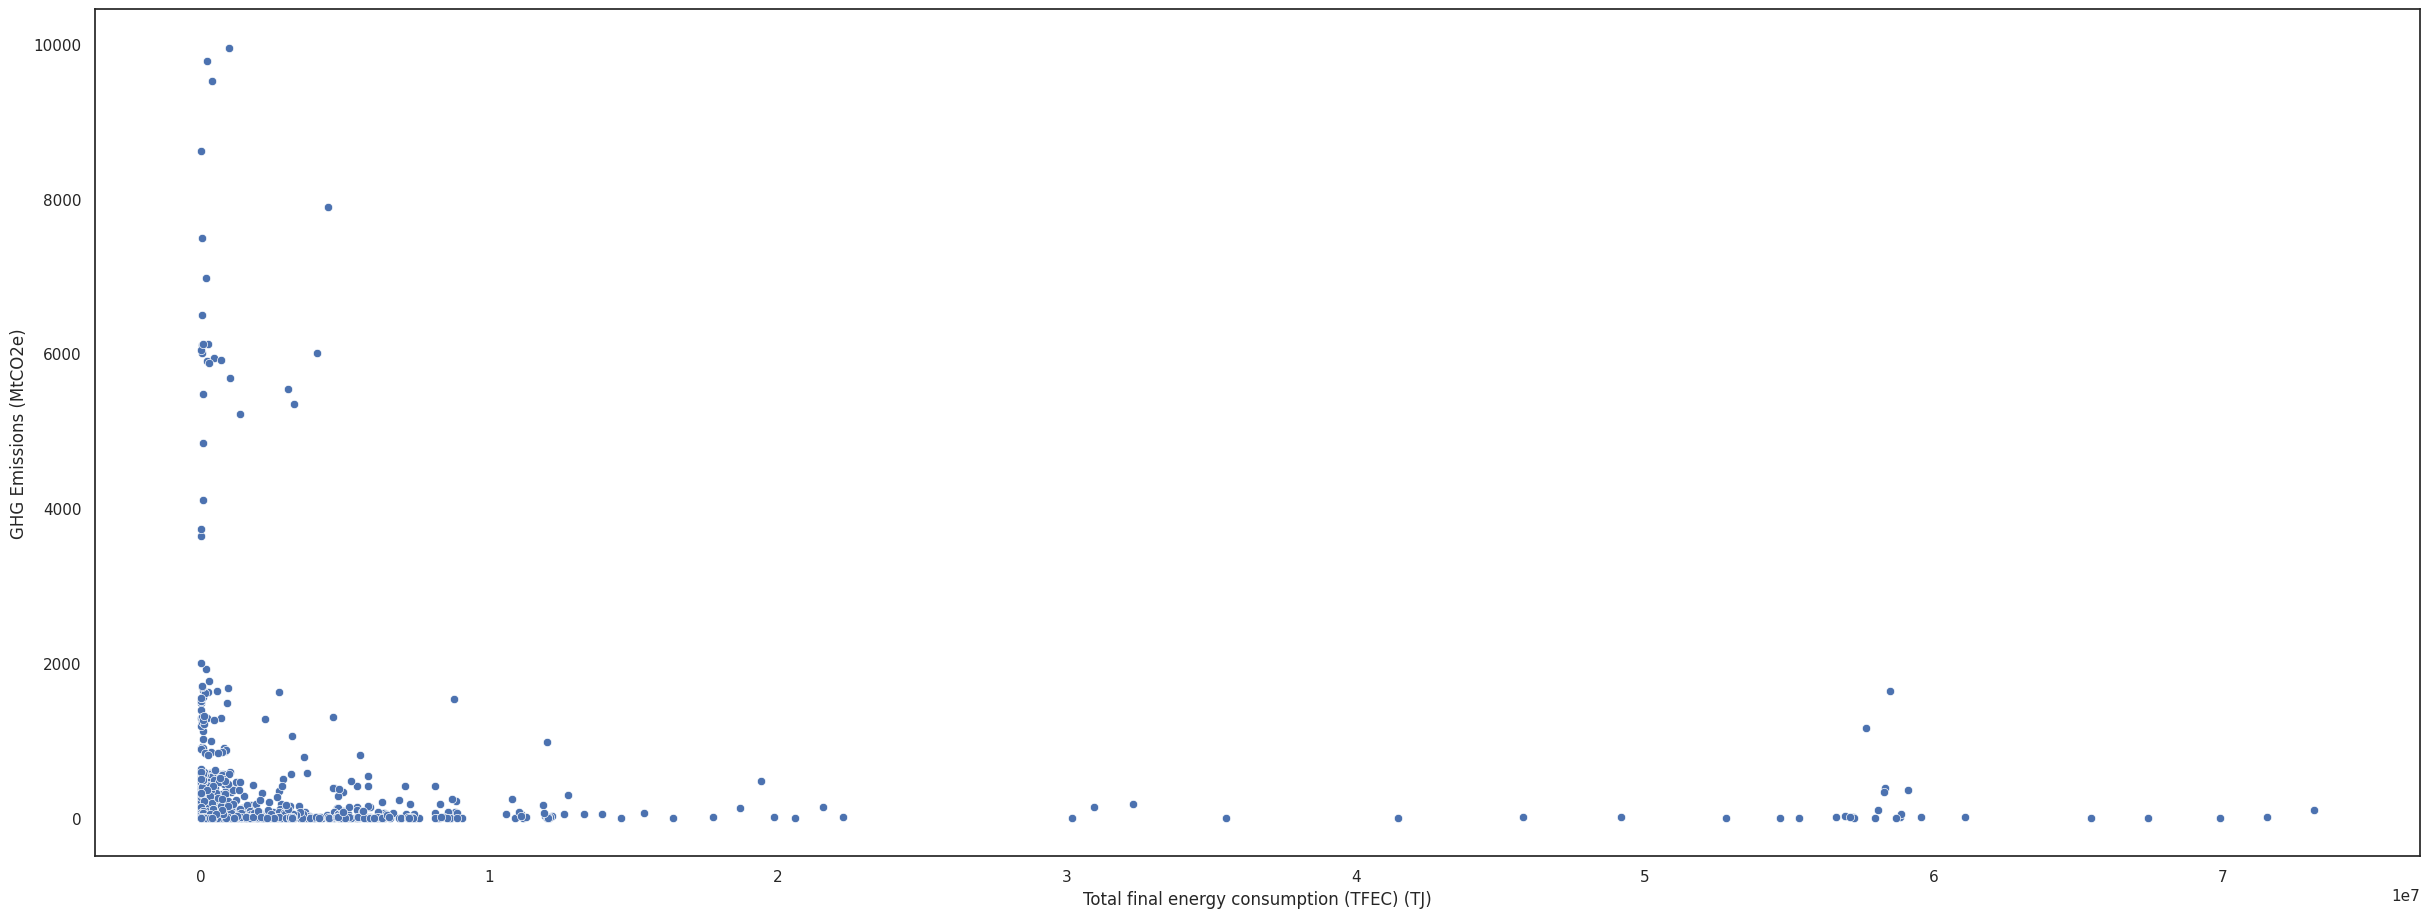

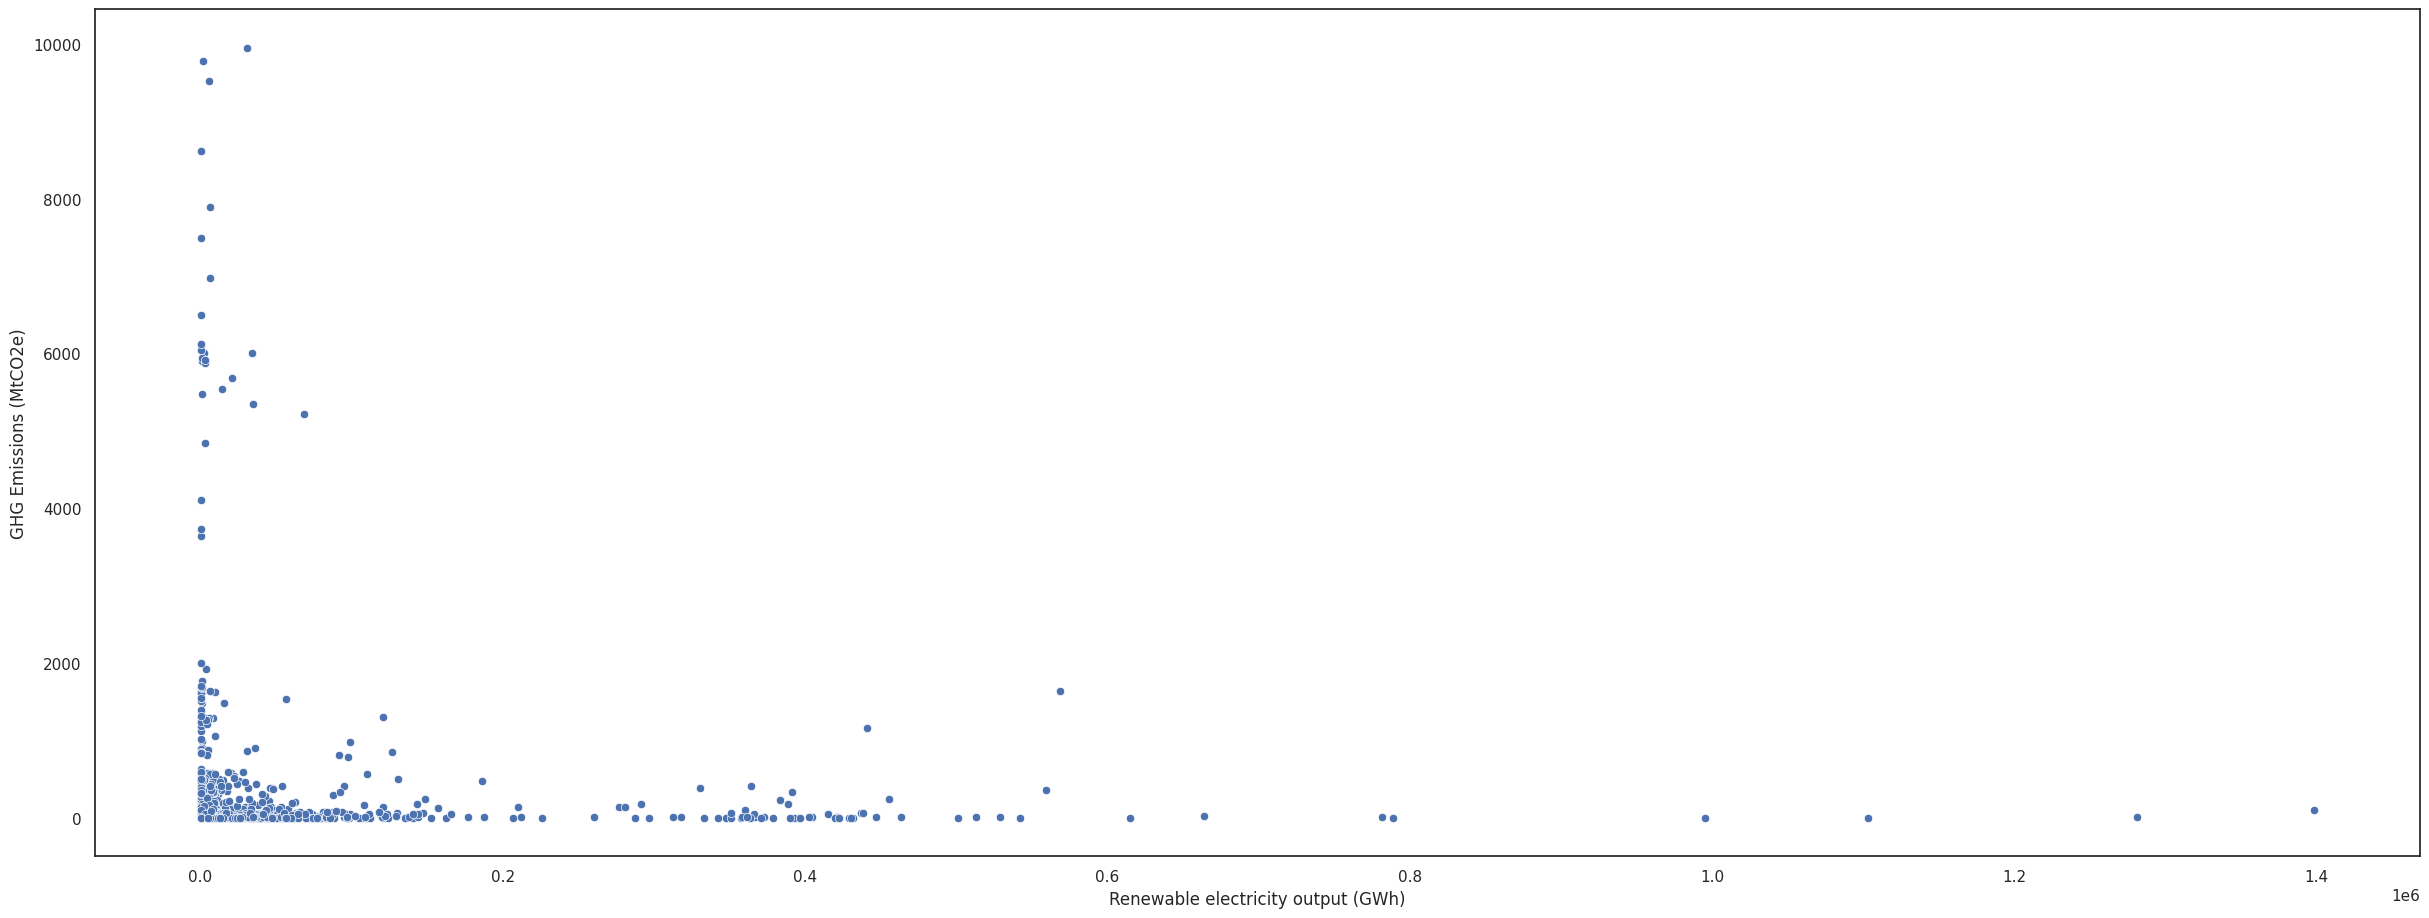

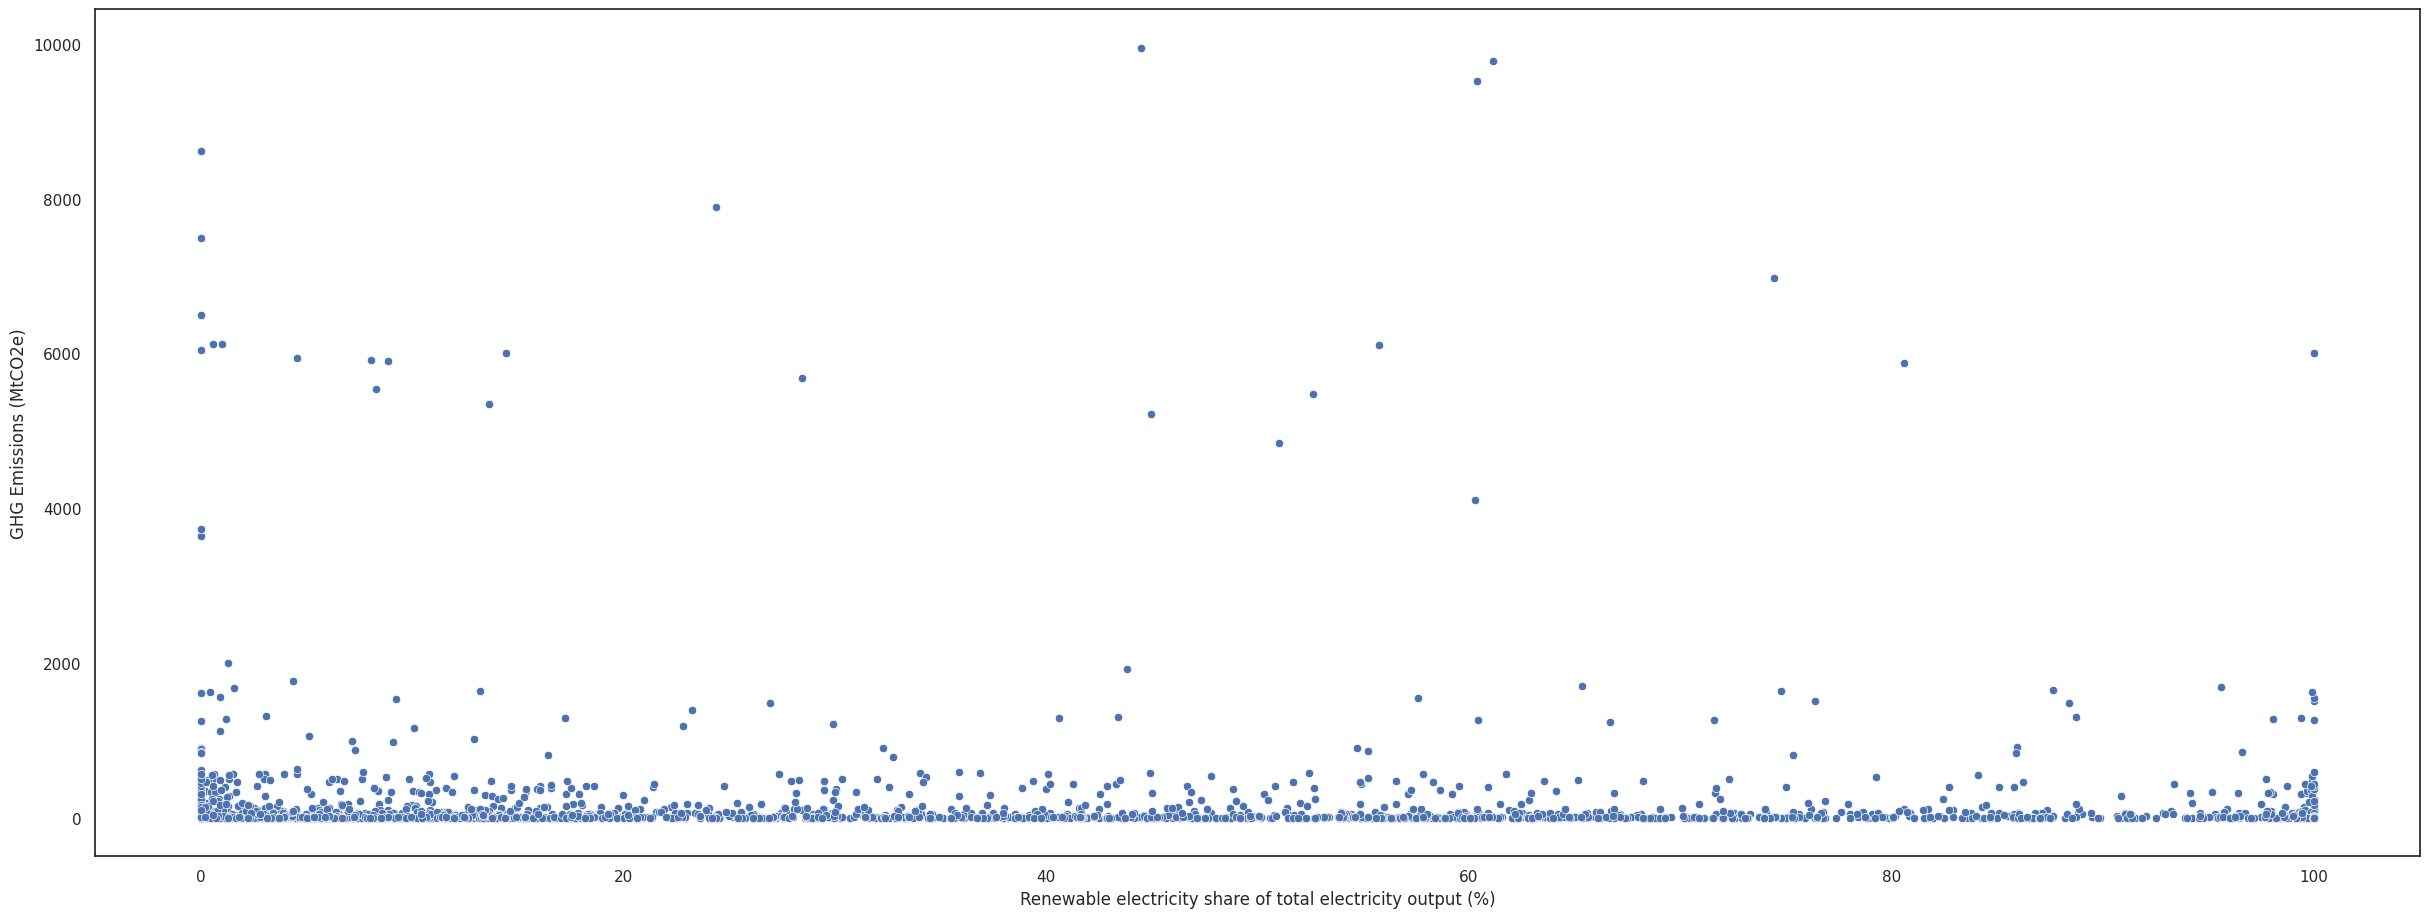

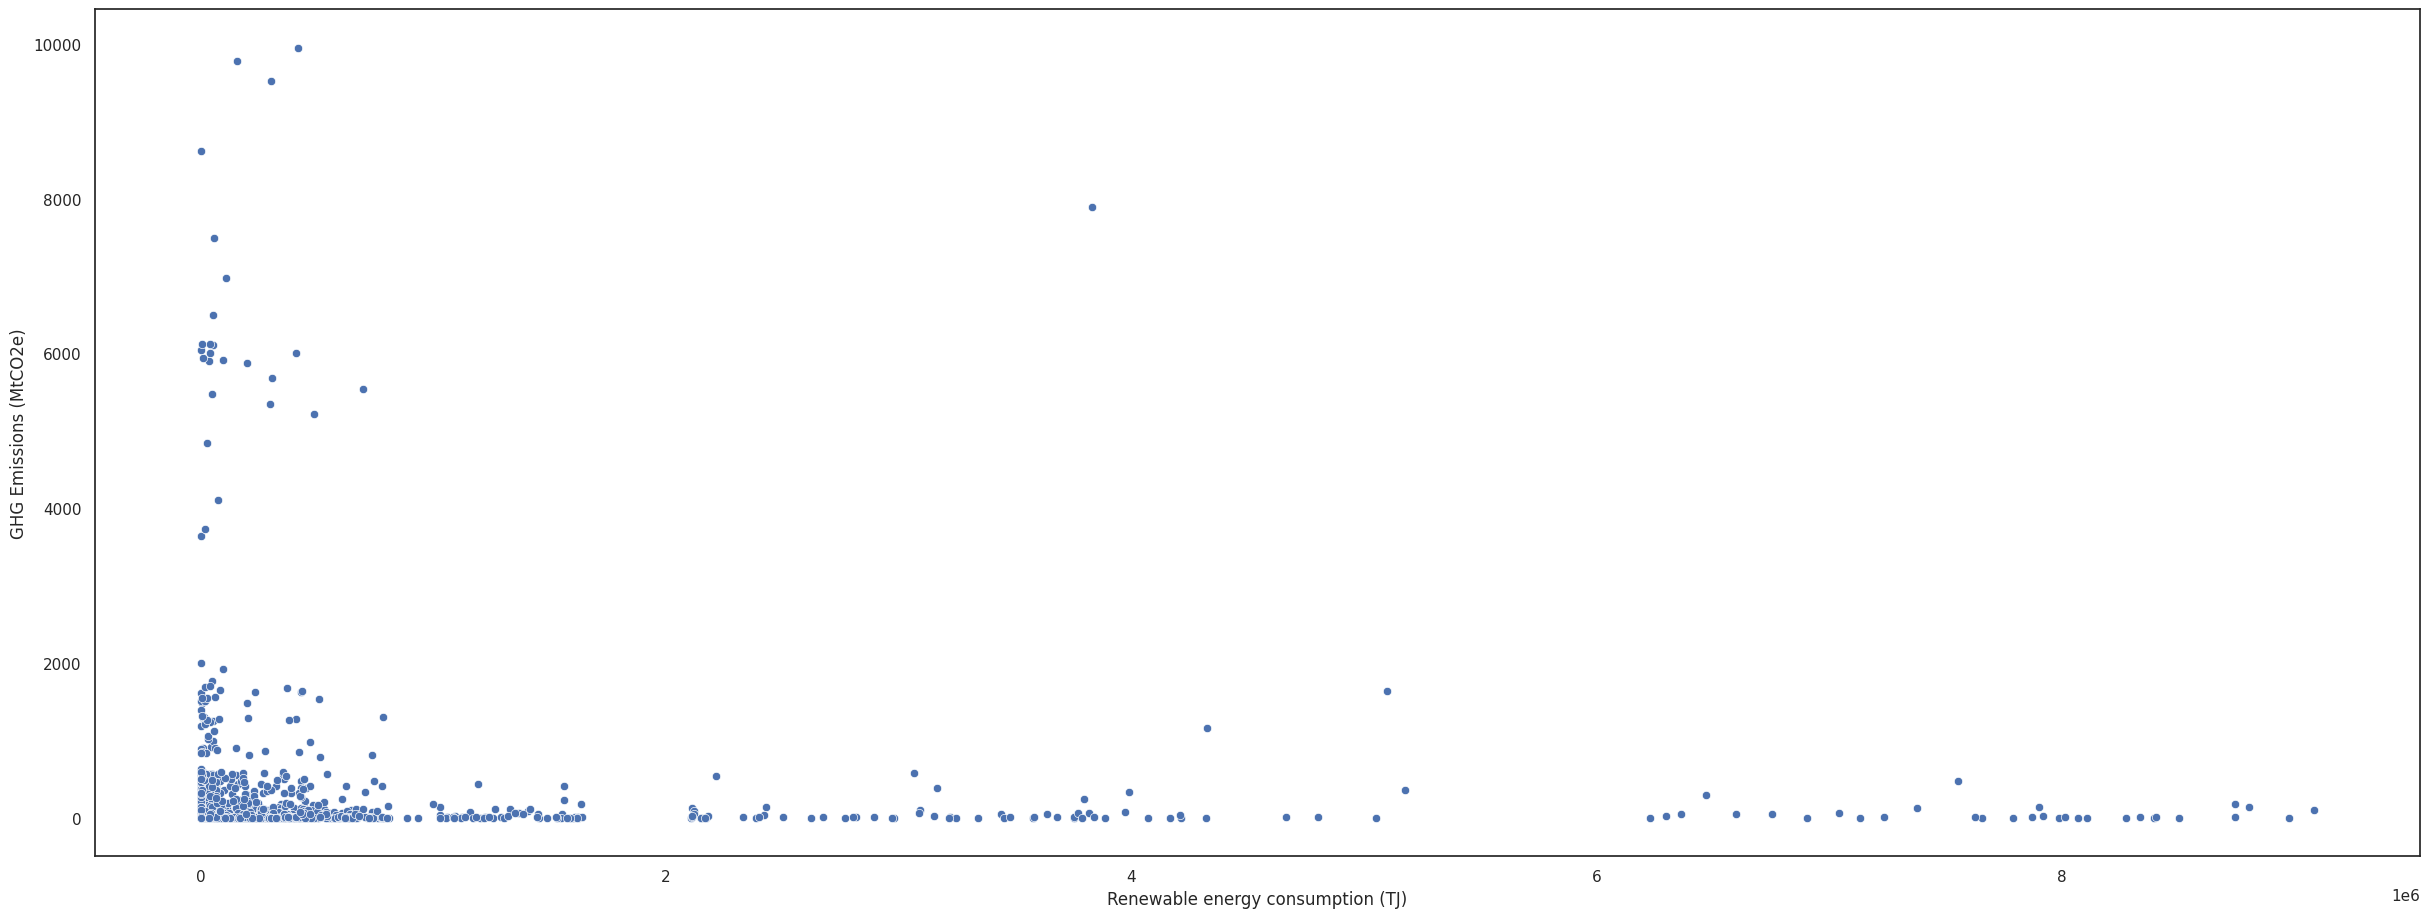

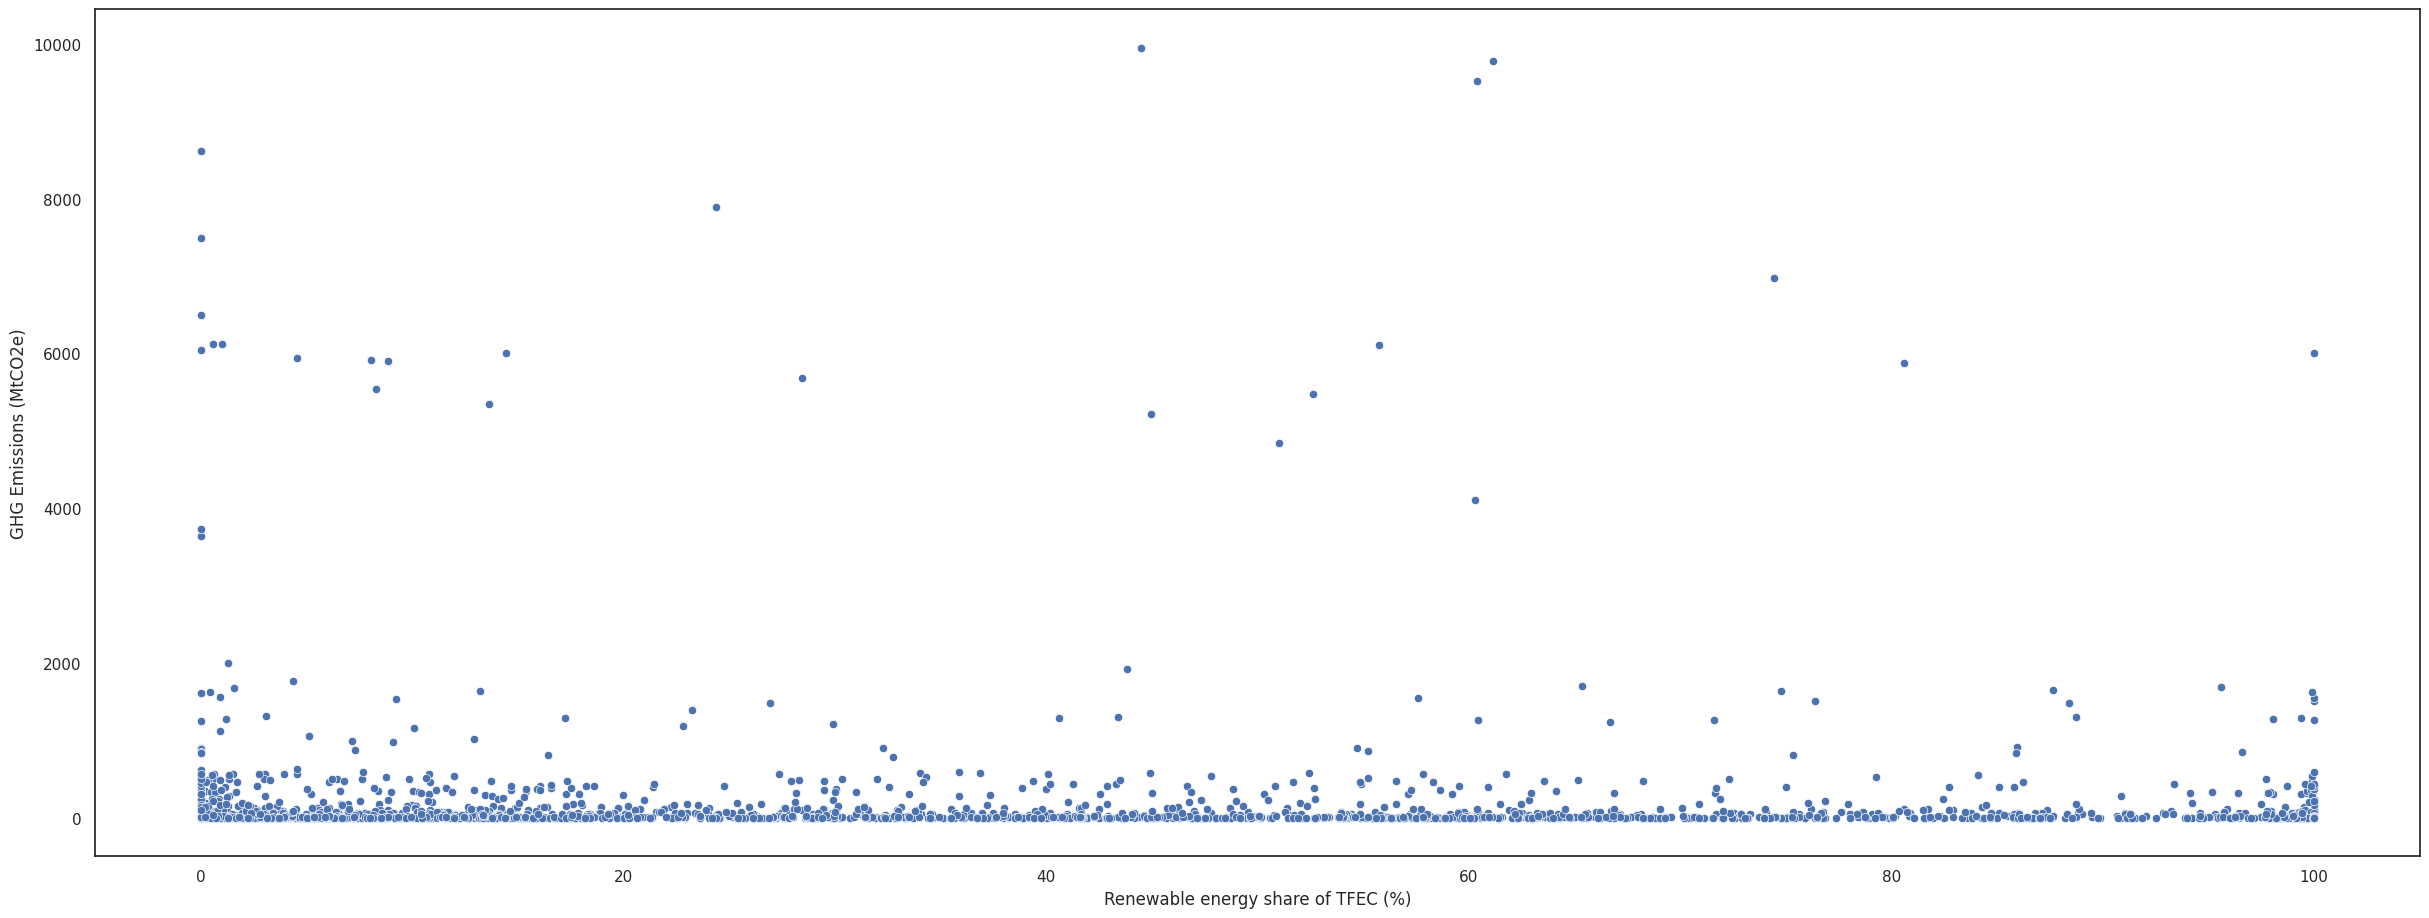

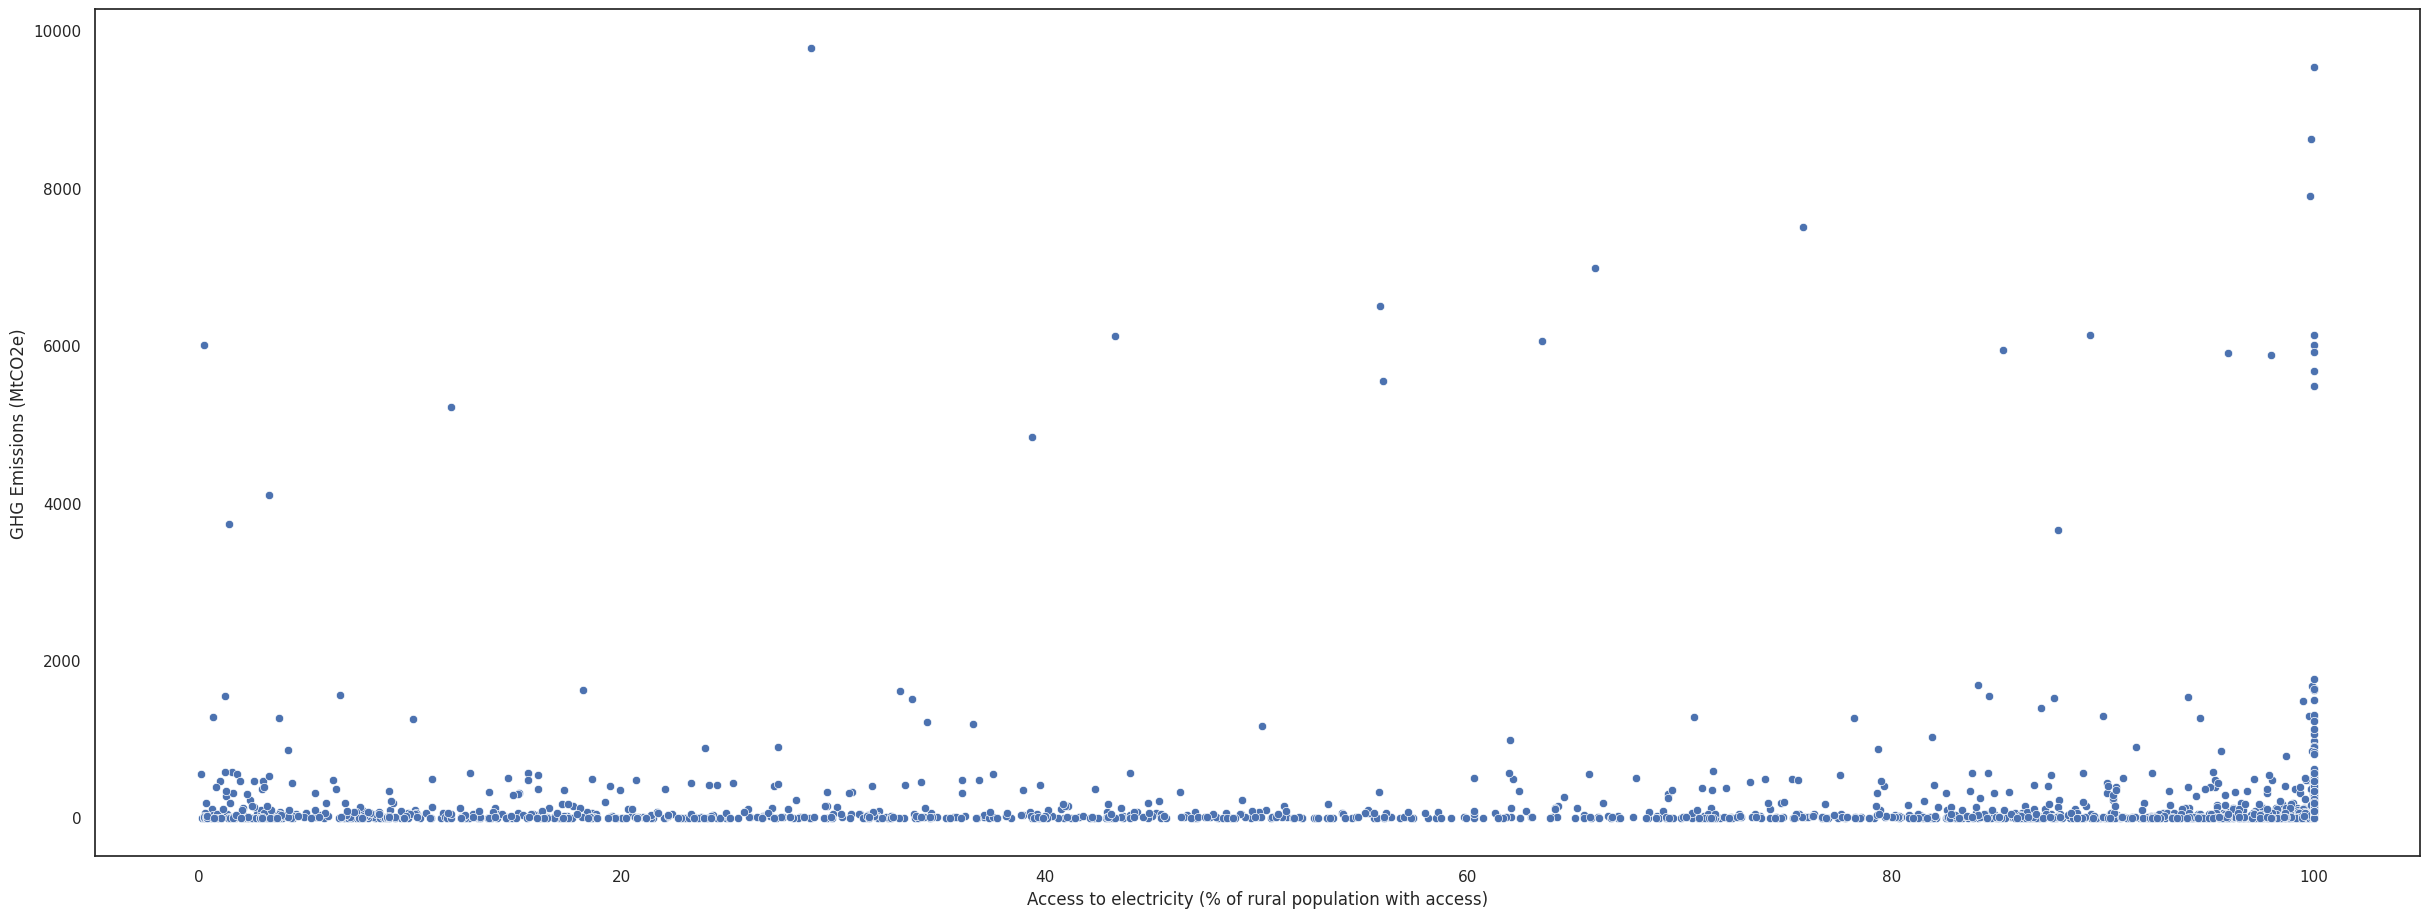

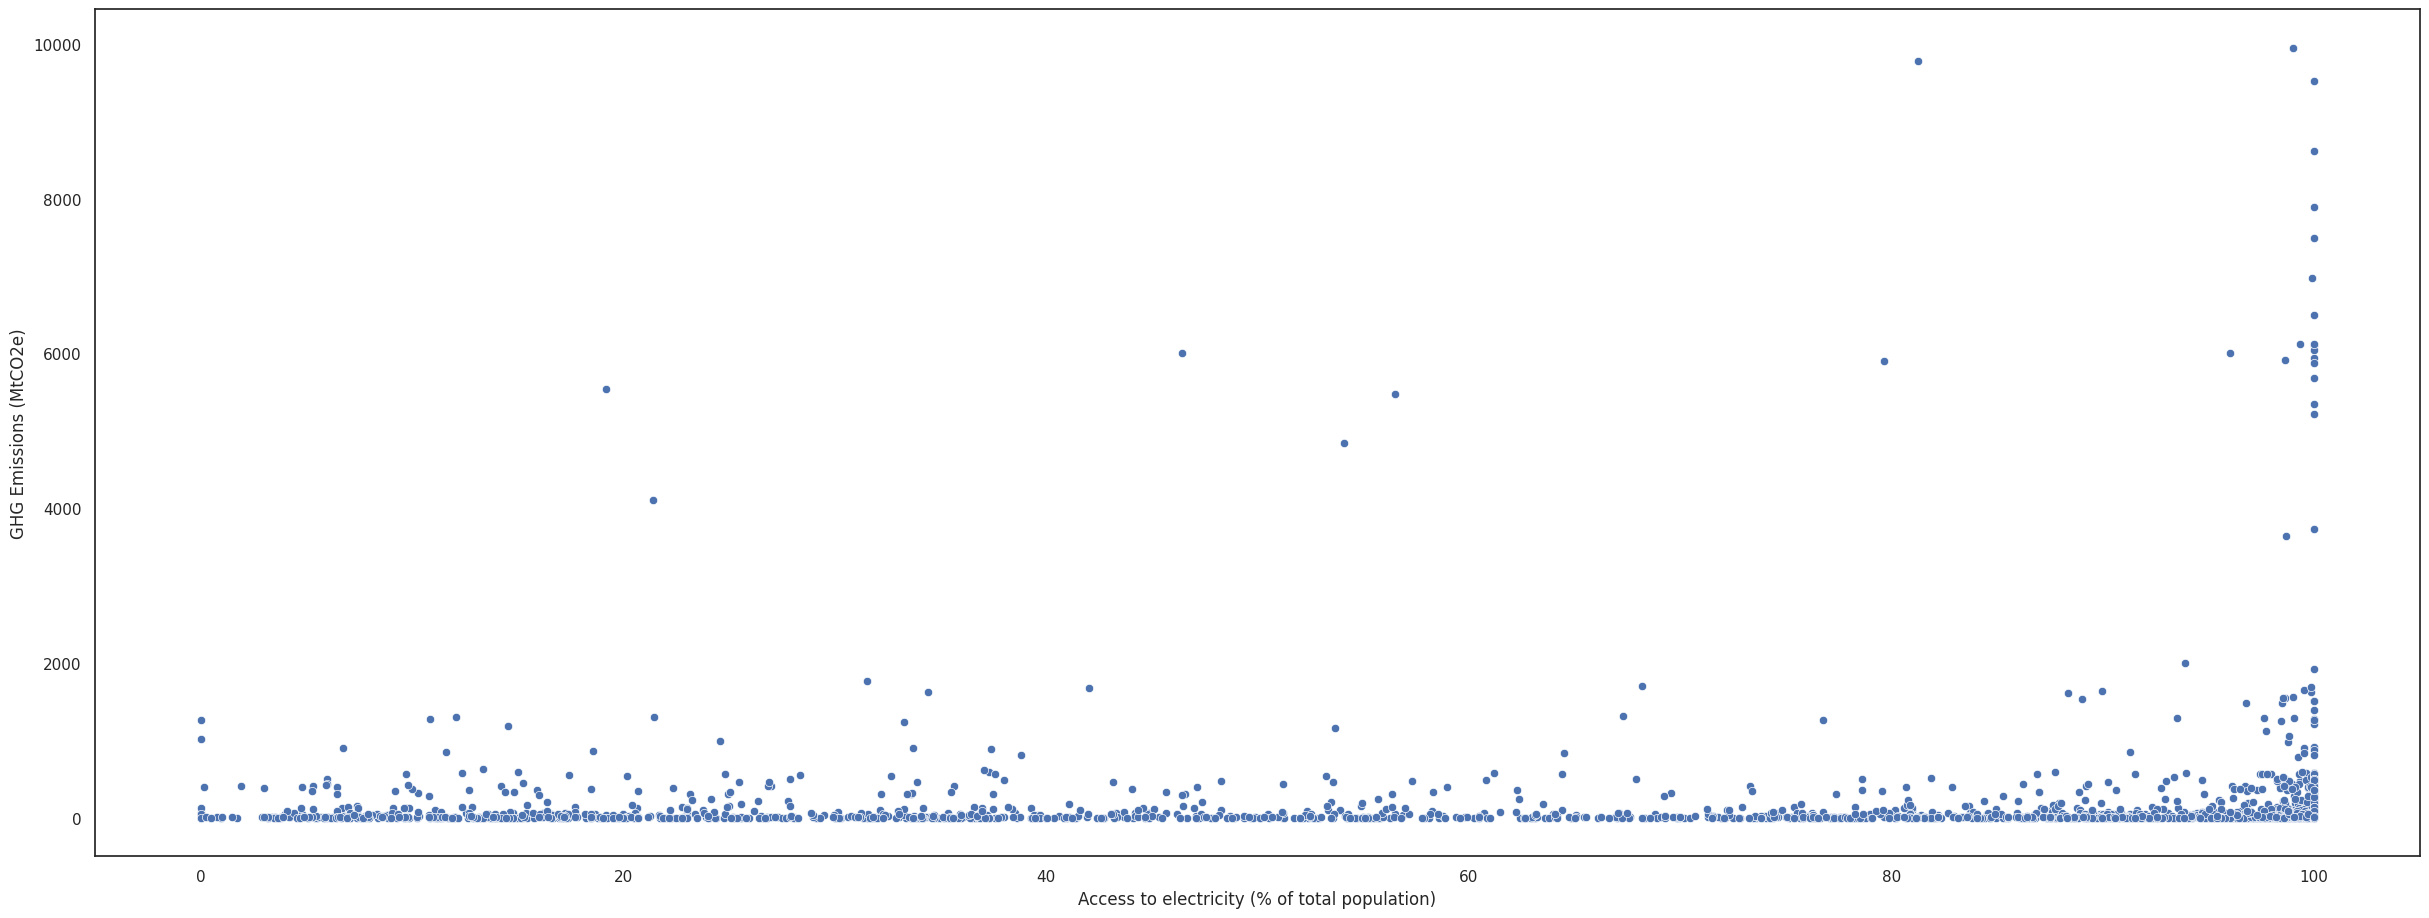

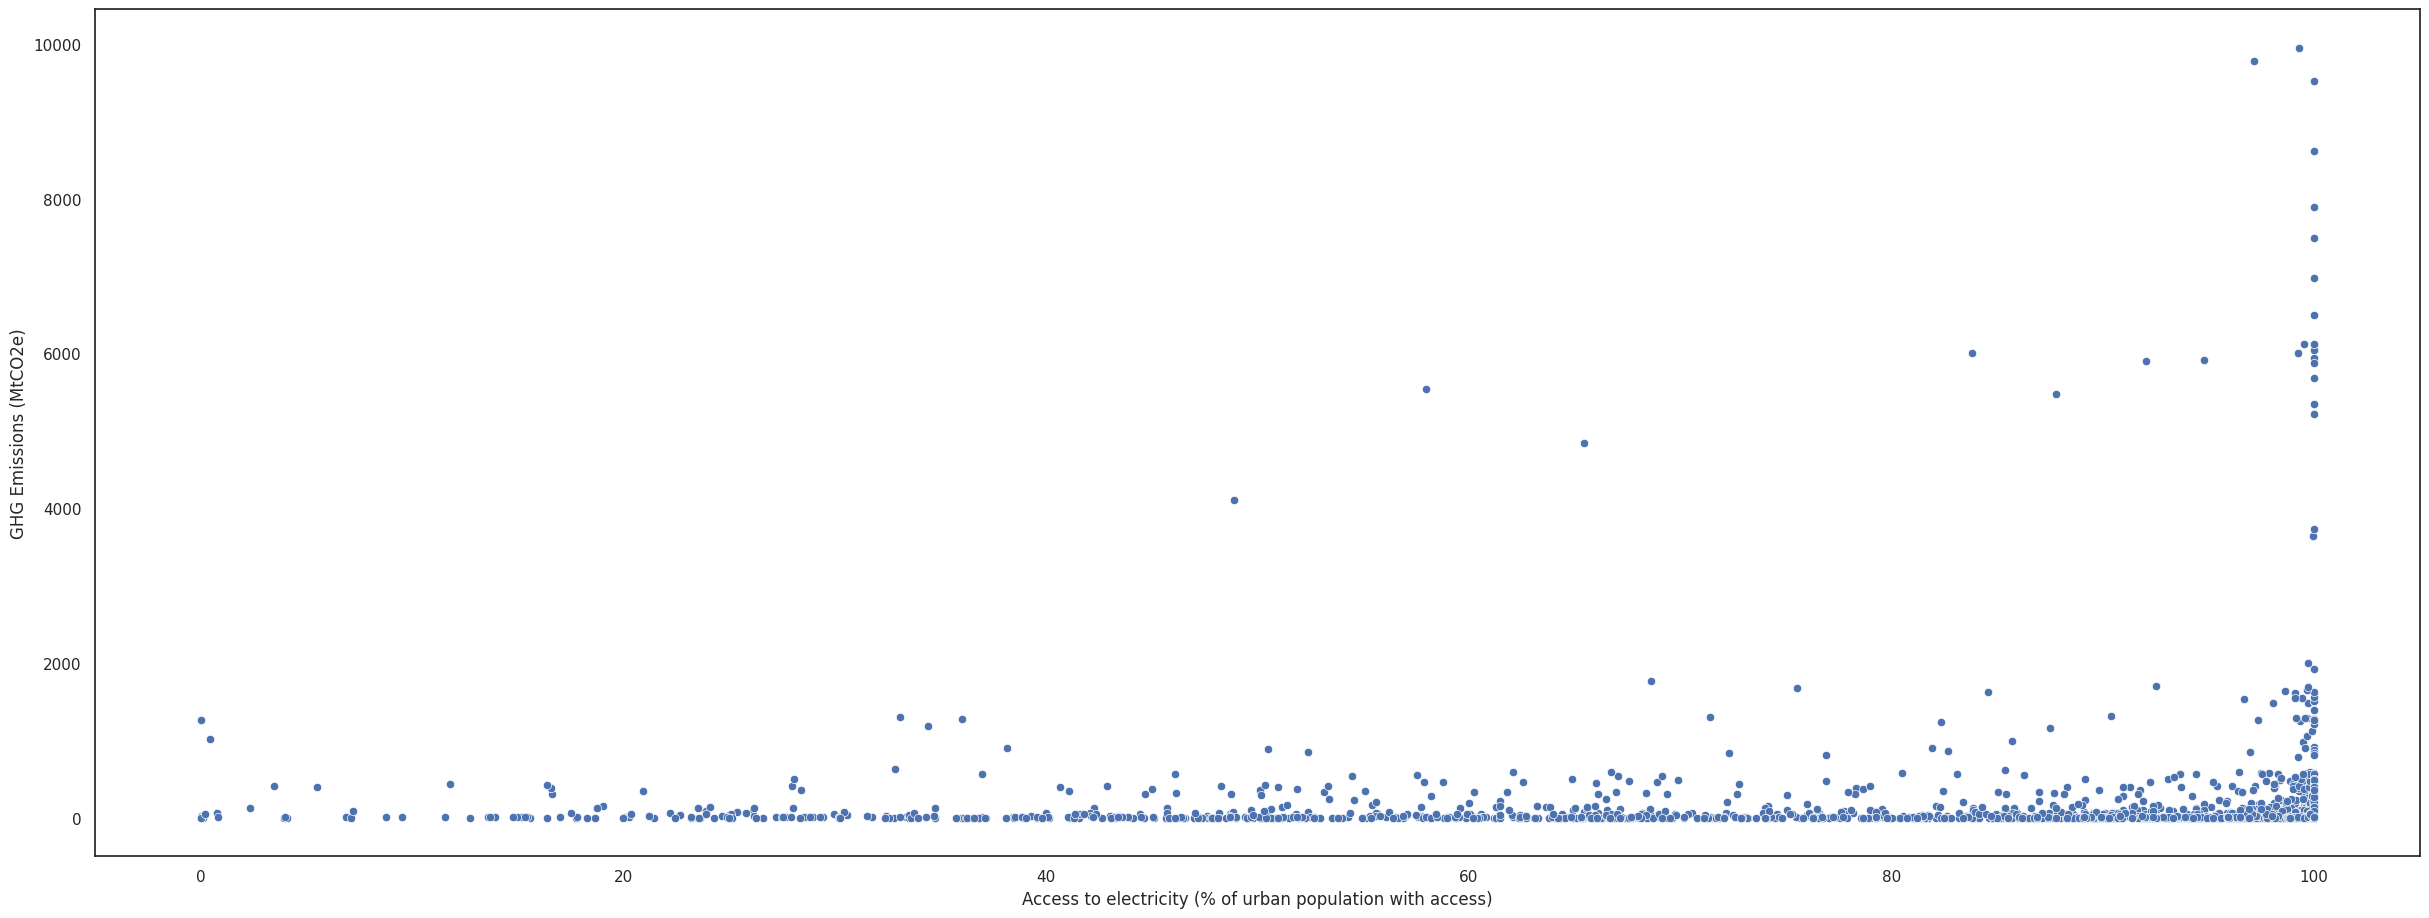

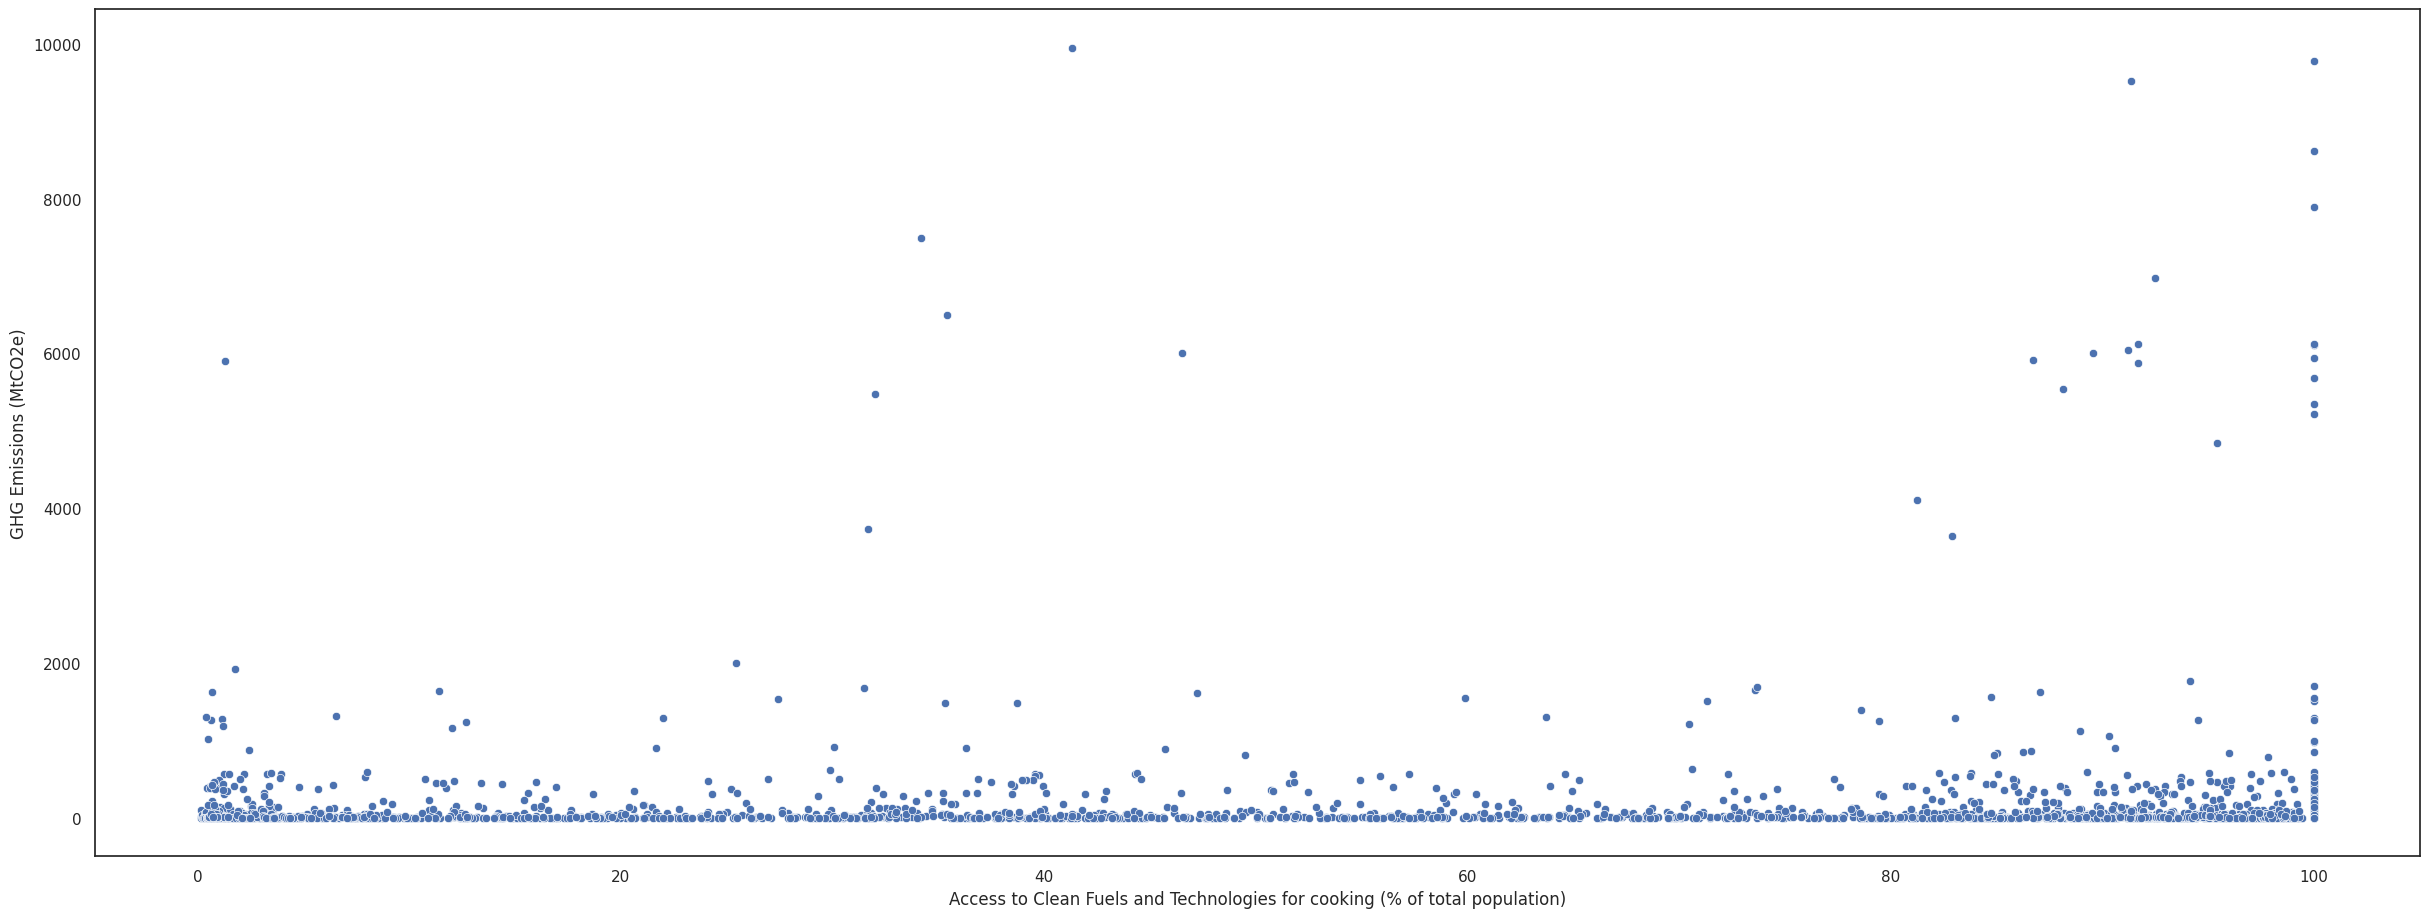

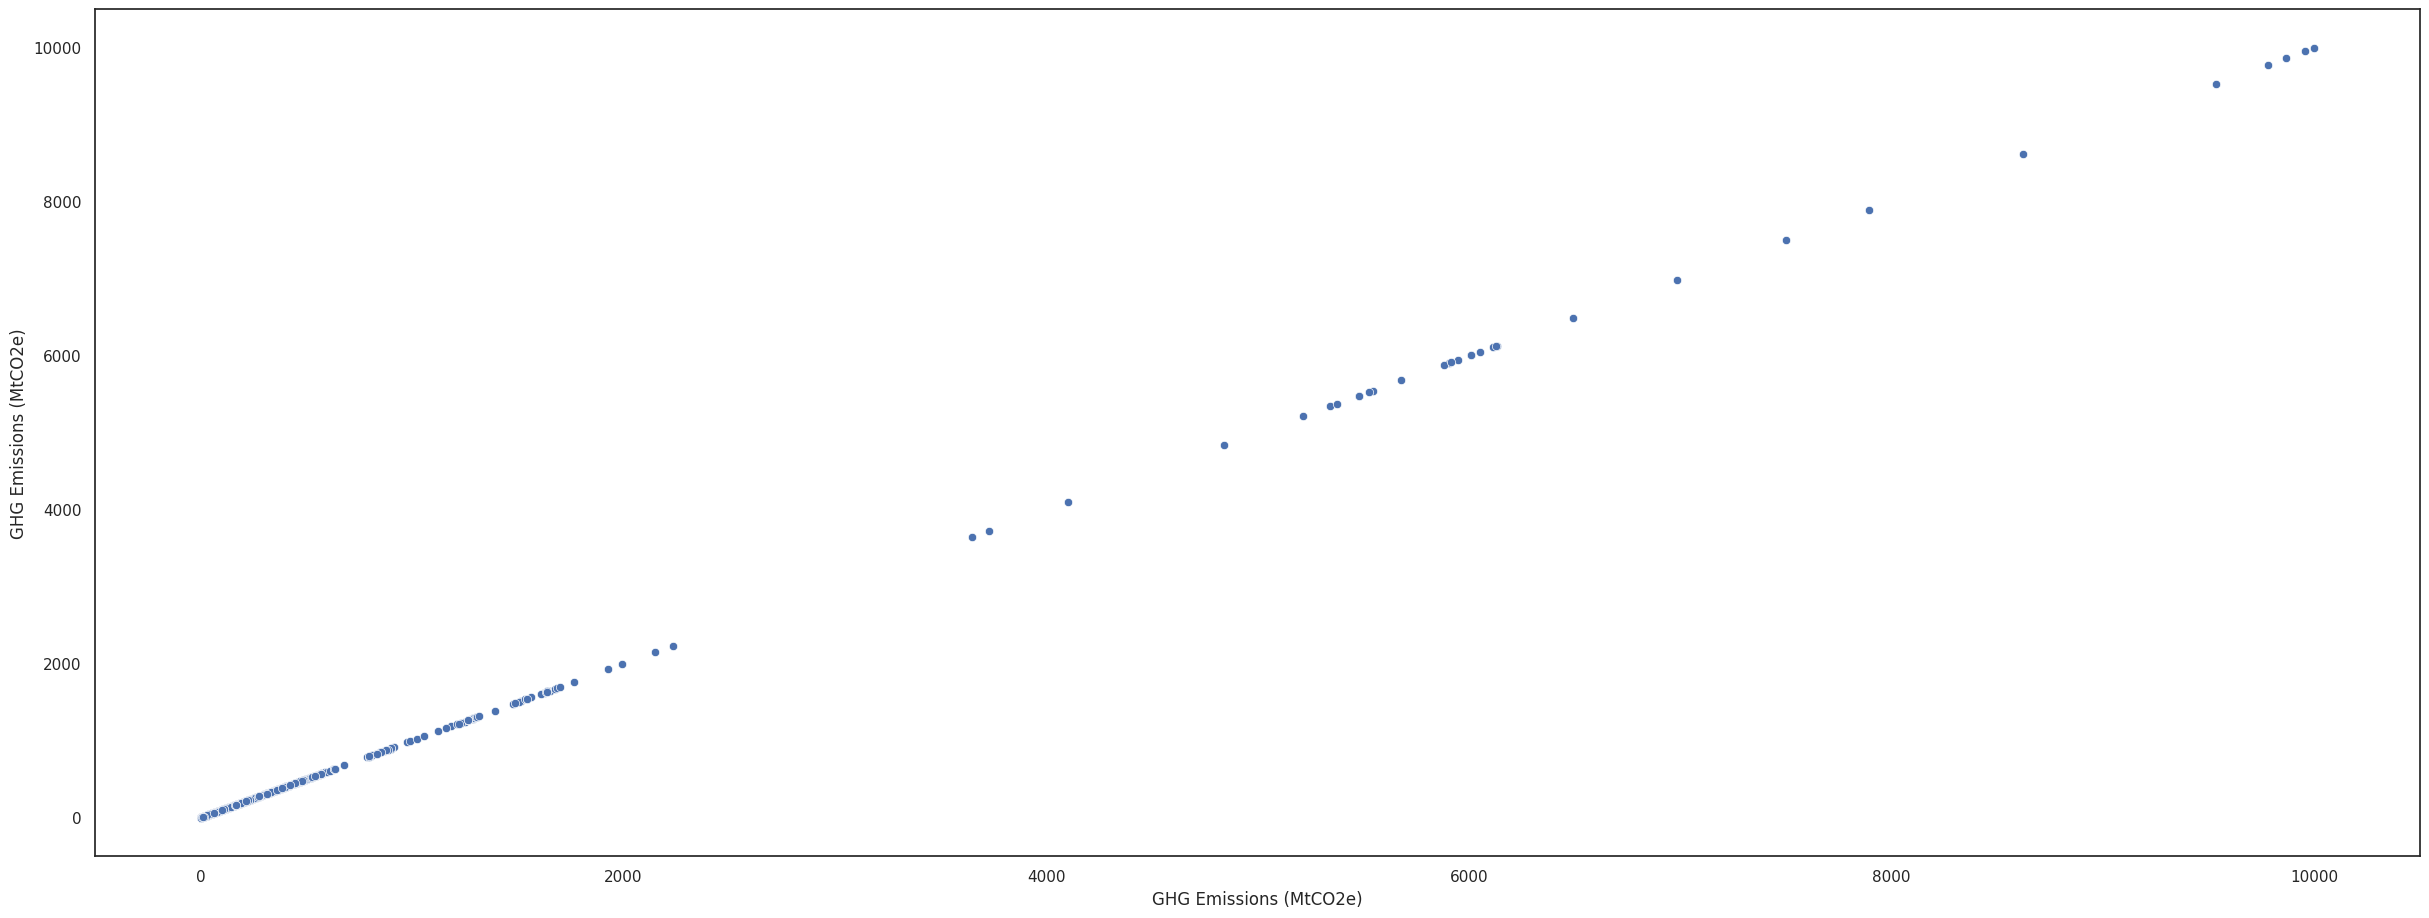

In [ ]:
#setting presets for the scatterplots and plotting each variable against GHG emissions
sns.set(font_scale=1.0, style='white')
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = urban_pop_new['Urban population (% of total population)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = eng_prim_new['Energy intensity level of primary energy (MJ/2011 USD PPP)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = forest_new['Forest area (% of land area)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = ag_land_new['Agricultural land (% of land area)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = fossil_fuel_consum_new['Fossil fuel energy consumption (% of total)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = gdp_per_cap_new['GDP per capita, PPP (current international $)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = tot_elec_out_new['Total electricity output (GWh)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = tot_eng_consum_new['Total final energy consumption (TFEC) (TJ)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = renew_elec_out_new['Renewable electricity output (GWh)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = renew_elec_share_tot_new['Renewable electricity share of total electricity output (%)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = renew_eng_consum_new['Renewable energy consumption (TJ)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = renew_eng_share__tfec_new['Renewable energy share of TFEC (%)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = acc_elec_rur_new['Access to electricity (% of rural population with access)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = acc_elec_tot_new['Access to electricity (% of total population)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = acc_elec_urb_new['Access to electricity (% of urban population with access)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = acc_ft_new['Access to Clean Fuels and Technologies for cooking (% of total population)'])
plt.show()
sns.scatterplot(y = ghg_new['GHG Emissions (MtCO2e)'], x = ghg_new['GHG Emissions (MtCO2e)'])
plt.show()